# Data preparation

In [1]:
import csv 
import os
import glob
import re 
from pandas import read_csv
import pandas as pd 
import numpy as np
#paths of Upstream link 
path_US_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\DataSet\Input\Backward Layer Estimation\All\Upstream Dataset\2019_*.csv'
path_Split_US_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\split'
path_Combined_US_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\combine\US_combined.csv'
path_Dataprep_US_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\combine\US_combined.csv'
path_Filtered_US_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\time filtered dataset\Time_filtered_US.csv'
path_Standardev_Split_US_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\standard deveation\Split'
path_Standardev_Combined_US_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\standard deveation\Combine\Standardev_US.csv'
path_Prepared_US_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\standard deveation\Combine\Standardev_US.csv'
US_After_StandardDev_Path=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\standard deveation\Output\US_after_sd.csv'
#paths for upstream and target 
path_USTL_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\input\2019_*.csv'
path_Split_USTL_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\split'
path_Combined_USTL_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\combine\USTL_combined.csv'
path_Dataprep_USTL_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\combine\USTL_combined.csv'
path_Filtered_USTL_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\time filtered dataset\Time_filtered_USTL.csv'
path_Standardev_Split_USTL_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\standard deveation\Split'
path_Standardev_Combined_USTL_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\standard deveation\Combine\Standardev_USTL.csv'
path_Prepared_USTL_dataset=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\standard deveation\Combine\Standardev_USTL.csv'
USTL_After_StandardDev_Path=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\standard deveation\Ouput\USTL_after_sd.csv'
#paths 
path_Final_Split=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US_+_USTL dataset\Standard Dev\Split'
path_Final_combine=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US_+_USTL dataset\Standard Dev\Combine\after_SD.csv'
final_path=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US_+_USTL dataset\OUTPUT\Backward(Final).csv'

# Data Preparation for Upstream Link |10007 -> 10004
def Data_preparation_US(path):
    count=0
    for filename in glob.glob(path_US_dataset):
        Temp_df= pd.read_csv(filename)  
        Temp_df.drop(Temp_df.columns[len(Temp_df.columns)-1], axis=1, inplace=True)
        Temp_df.drop(Temp_df.columns[len(Temp_df.columns)-1], axis=1, inplace=True)
        Temp_df.drop(Temp_df.columns[len(Temp_df.columns)-1], axis=1, inplace=True)
        Temp_df.columns = ['year','month (in digit)','DAY','DayType','Bin (min)','Shift (min)','Time (hr)','SampleSize_US','MeanTT(sec)_US','Median','Mode','Max','Min','Variance','StandardDev of TT (v2v)','LowerQUartile','UpperQuartile','95th_Percentile of TT','Buffer time','BufferTimeIndex']
        id=100070004
        Temp_df.insert(20,"Btlinkid", id) 
        cols = ['year','month (in digit)','DAY']
        newcol = ['/'.join(i) for i in Temp_df[cols].astype(str).values]
        Temp_df = Temp_df.assign(Date=newcol).drop(cols, 1)
        Temp_df["Date"]= pd.to_datetime(Temp_df["Date"])
        Temp_df["Day_of_week"]=Temp_df["Date"].dt.dayofweek
        Temp_df["Day_name"]=Temp_df["Date"].dt.day_name()
        Temp_df.to_csv(r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\split\C%s.csv' %count,index=False) # Increament file naming variable
        count=count+1

# Data Preparation for Upstream Link |10007 -> 10002
def Data_preparation_USTL(path):
    count=0
    for filename in glob.glob(path_USTL_dataset):
        Temp_df= pd.read_csv(filename)  
        Temp_df.drop(Temp_df.columns[len(Temp_df.columns)-1], axis=1, inplace=True)
        Temp_df.drop(Temp_df.columns[len(Temp_df.columns)-1], axis=1, inplace=True)
        Temp_df.drop(Temp_df.columns[len(Temp_df.columns)-1], axis=1, inplace=True)
        Temp_df.columns = ['year','month (in digit)','DAY','DayType','Bin (min)','Shift (min)','Time (hr)','SampleSize_USTL','MeanTT(sec)_USTL','Median','Mode','Max','Min','Variance','StandardDev of TT (v2v)','LowerQUartile','UpperQuartile','95th_Percentile of TT','Buffer time','BufferTimeIndex']
        id=100070002    
        Temp_df.insert(20,"Btlinkid", id) 
        cols = ['year','month (in digit)','DAY']
        newcol = ['/'.join(i) for i in Temp_df[cols].astype(str).values]
        Temp_df = Temp_df.assign(Date=newcol).drop(cols, 1)
        Temp_df["Date"]= pd.to_datetime(Temp_df["Date"])
        Temp_df["Day_of_week"]=Temp_df["Date"].dt.dayofweek
        Temp_df["Day_name"]=Temp_df["Date"].dt.day_name()
        Temp_df.to_csv(r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\split\C%s.csv' %count,index=False) # Increament file naming variable
        count=count+1

#combine the prepared data into a single file         
def Data_combination(ipath,opath):
    os.chdir(ipath)
    extension = 'csv'
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
    combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
    combined_csv.to_csv(opath, index=False, encoding='utf-8-sig') 
    return combined_csv

#filter the day any time for the dataset 
def Data_filtering(ipath,opath):
    tl_df_de= pd.read_csv(ipath)
    Day_filter_de = tl_df_de[tl_df_de['DayType']==1]
    Time_filter1_de = Day_filter_de[Day_filter_de['Time (hr)']>=5]
    Time_filter2_de = Time_filter1_de[Time_filter1_de['Time (hr)']<=7]
    Time_filter2_de=Time_filter2_de.reset_index(drop=True)
    Time_filter2_de.to_csv(opath, index=False, encoding='utf-8-sig') 
    return Time_filter2_de

def Standard_dev_US(Filtered_df):
    Dow=Filtered_df['Day_of_week'].unique()
    Dow=list(Dow)
    Toh=Filtered_df['Time (hr)'].unique()
    Toh=list(Toh)
    count=0
    for x in Dow: 
        for y in Toh:
            df_8am=Filtered_df.loc[Filtered_df['Day_of_week']==x]
            df_8am=df_8am.loc[df_8am['Time (hr)']==y]
            df_8am=df_8am.reset_index(drop=True)
            df_8am['sample_Mean']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'sample_Mean']=df_8am.loc[i,'MeanTT(sec)_US']*df_8am.loc[i,'SampleSize_US']
                        #x^=sum(x*n)/sum(n)
            df_8am['x']=df_8am['sample_Mean'].sum()/df_8am['SampleSize_US'].sum()    
            df_8am['d']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'d']=df_8am.loc[i,'MeanTT(sec)_US']-df_8am.at[i,'x']         
            df_8am['variance_']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'variance_']=df_8am.loc[i,'SampleSize_US']*(df_8am.loc[i,'Variance']+df_8am.loc[i,'d']**2)

            df_8am['S_D_at_Time_US']=np.sqrt(df_8am['variance_'].sum()/df_8am['SampleSize_US'].sum())
            df_8am.to_csv(r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US dataset\standard deveation\Split\C%s.csv' %count,index=False)
            count=count+1
            
def Standard_dev_USTL(Filtered_df):
    Dow=Filtered_df['Day_of_week'].unique()
    Dow=list(Dow)
    Toh=Filtered_df['Time (hr)'].unique()
    Toh=list(Toh)
    count=0
    for x in Dow: 
        for y in Toh:
            df_8am=Filtered_df.loc[Filtered_df['Day_of_week']==x]
            df_8am=df_8am.loc[df_8am['Time (hr)']==y]
            df_8am=df_8am.reset_index(drop=True)
            df_8am['sample_Mean']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'sample_Mean']=df_8am.loc[i,'MeanTT(sec)_USTL']*df_8am.loc[i,'SampleSize_USTL']
                        #x^=sum(x*n)/sum(n)
            df_8am['x']=df_8am['sample_Mean'].sum()/df_8am['SampleSize_USTL'].sum()    
            df_8am['d']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'d']=df_8am.loc[i,'MeanTT(sec)_USTL']-df_8am.at[i,'x']         
            df_8am['variance_']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'variance_']=df_8am.loc[i,'SampleSize_USTL']*(df_8am.loc[i,'Variance']+df_8am.loc[i,'d']**2)

            df_8am['S_D_at_Time_USTL']=np.sqrt(df_8am['variance_'].sum()/df_8am['SampleSize_USTL'].sum())
            df_8am.to_csv(r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\USTL dataset\standard deveation\Split\C%s.csv' %count,index=False)
            count=count+1


def Standard_dev(Filtered_df):
    Dow=Filtered_df['Day_of_week'].unique()
    Dow=list(Dow)
    Toh=Filtered_df['Time (hr)'].unique()
    Toh=list(Toh)
    count=0
    for x in Dow: 
        for y in Toh:
            df_8am=Filtered_df.loc[Filtered_df['Day_of_week']==x]
            df_8am=df_8am.loc[df_8am['Time (hr)']==y]
            df_8am=df_8am.reset_index(drop=True)
            df_8am['sample_Mean']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'sample_Mean']=df_8am.loc[i,'Target_Link_TTSec']*df_8am.loc[i,'Min_Sample_Size']
                        #x^=sum(x*n)/sum(n)
            df_8am['x']=df_8am['sample_Mean'].sum()/df_8am['Min_Sample_Size'].sum()    
            df_8am['d']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'d']=df_8am.loc[i,'Target_Link_TTSec']-df_8am.at[i,'x']         
            df_8am['variance_']=" "
            for i in range(len(df_8am)):
                df_8am.loc[i,'variance_']=df_8am.loc[i,'Min_Sample_Size']*(df_8am.loc[i,'Variance']+df_8am.loc[i,'d']**2)

            df_8am['S_D_at_Time']=np.sqrt(df_8am['variance_'].sum()/df_8am['Min_Sample_Size'].sum())
            df_8am.to_csv(r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US_+_USTL dataset\Standard Dev\Split\C%s.csv' %count,index=False)
            count=count+1

            

#Upstream 

Data_preparation_US(path_US_dataset)

Data_combination(path_Split_US_dataset,path_Combined_US_dataset)

Filtered_US_df=Data_filtering(path_Dataprep_US_dataset,path_Filtered_US_dataset)

Standard_dev_US(Filtered_US_df)

Data_combination(path_Standardev_Split_US_dataset,path_Standardev_Combined_US_dataset)

US_df=pd.read_csv(path_Prepared_US_dataset)

US_df=US_df.sort_values(['Date', 'Time (hr)'], ascending=[True, True])

US_df=US_df.reset_index(drop=True)
    
US_df.to_csv(US_After_StandardDev_Path)

#Upstream + Target

Data_preparation_USTL(path_USTL_dataset)

Data_combination(path_Split_USTL_dataset,path_Combined_USTL_dataset)

Filtered_USTL_df=Data_filtering(path_Dataprep_USTL_dataset,path_Filtered_USTL_dataset)

Standard_dev_USTL(Filtered_USTL_df)

Data_combination(path_Standardev_Split_USTL_dataset,path_Standardev_Combined_USTL_dataset)

USTL_df=pd.read_csv(path_Prepared_USTL_dataset)

USTL_df=USTL_df.sort_values(['Date', 'Time (hr)'], ascending=[True, True])

USTL_df=USTL_df.reset_index(drop=True)
    
USTL_df.to_csv(USTL_After_StandardDev_Path)

# taking only the relevant columns 
df_US = US_df.filter(['Btlinkid','Date','Time (hr)','MeanTT(sec)_US','SampleSize_US','S_D_at_Time_US' ], axis=1)
df_USTL = USTL_df.filter(['Btlinkid','Date','Time (hr)','MeanTT(sec)_USTL','SampleSize_USTL','S_D_at_Time_USTL' ], axis=1)


# BACKWARD LAYER ESTIMATION 
#set the indices of both the dataframe to 0 before outer joining
BEA = pd.concat([df_US,df_USTL], axis=1)

BEA['Flag']=(BEA['SampleSize_USTL']>0) & (BEA['SampleSize_US']>0)

BEA.loc[BEA['Flag'] == False, 'Target_Link_TTSec'] = 0 # set all the fileds having sample size atleast once as 0 to Falsy
BEA.loc[BEA['Flag'] == True, 'Target_Link_TTSec'] = BEA['MeanTT(sec)_USTL']-BEA['MeanTT(sec)_US']

BEA=BEA.iloc[:,~BEA.columns.duplicated()] # Removing the duplicated coluymns 

BEA['MeanTT(sec)_US']=BEA['MeanTT(sec)_US'].fillna(0)

BEA['Time_Target']=""
Interval=60; 
BEA['Min Sample Size']=""  

# Min Sample Size
for i in range(BEA.shape[0]):
    BEA.at[i,'Min_Sample_Size']=min(BEA.at[i,'SampleSize_US'],BEA.at[i,'SampleSize_USTL'])
BEA['Max Standard Dev']="" 

# Maximum Standard deviation 
for i in range(BEA.shape[0]):
    BEA.at[i,'Max_Standard_Dev']=max(BEA.at[i,'S_D_at_Time_US'],BEA.at[i,'S_D_at_Time_USTL'])

C:\Users\shesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\shesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:142: RuntimeWarning: invalid value encountered in longlong_scalars


# Target time calculation

In [4]:
##################################### continue Manual work
########################tricky Here, cange from BREAK to CONTINUE and back to BREAK, execute twice (pass-fail-pass)
for i in range(BEA.shape[0]):
    if (BEA['MeanTT(sec)_US'][i])<=Interval: 
        BEA.at[i,'Time_Target']=BEA.at[i,'Time (hr)']
        break 
    elif (BEA['MeanTT(sec)_US'][i])<=(2*Interval):    #120 seconds interval
        BEA.at[i,'Time_Target']=BEA.at[i+1,'Time (hr)']
        break
    elif (BEA['MeanTT(sec)_US'][i])<=(3*Interval):    #240 seconds interval
        BEA.at[i,'Time_Target']=BEA.at[i+2,'Time (hr)']
        break
    elif (BEA['MeanTT(sec)_US'][i])<=(4*Interval):    #360 seconds interval
        BEA.at[i,'Time_Target']=BEA.at[i+3,'Time (hr)']
        break

In [5]:
for i in range(len(BEA)):
    if (BEA.at[i,'Target_Link_TTSec']<25):
        BEA.at[i,'Target_Link_TTSec']=0
        BEA.at[i,'SampleSize_USTL']=0
# (distnace of the traget link/5)*3600         
for i in range(len(BEA)):
    if (BEA.at[i,'Target_Link_TTSec']>300):
        BEA.at[i,'Target_Link_TTSec']=0
        BEA.at[i,'SampleSize_USTL']=0        

#BEA.drop(BEA.loc[BEA['Min_Sample_Size']==0].index,inplace=True)
o=BEA.groupby(['Date','Time (hr)']).Target_Link_TTSec.mean()
o1=BEA.groupby(['Date','Time (hr)']).Min_Sample_Size.sum()
OP = pd.concat([o, o1], axis=1)
OP=OP.iloc[:,~OP.columns.duplicated()]
path_output_after_BLE=r"C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Backward Layer\US_+_USTL dataset\Time_at_target_&_Travel_time\before_ste_&_weight.csv"
OP.to_csv(path_output_after_BLE,index=True)    
Final=pd.read_csv(path_output_after_BLE)
Final['Variance']=BEA['Max_Standard_Dev']**2
Final["Date"]= pd.to_datetime(Final["Date"])
Final["Day_of_week"]=Final["Date"].dt.dayofweek
Final["Day_name"]=Final["Date"].dt.day_name()
Standard_dev(Final)

Data_combination(path_Final_Split,path_Final_combine)

combined_TL=pd.read_csv(path_Final_combine)

combined_TL=combined_TL.sort_values(['Date', 'Time (hr)'], ascending=[True, True])

combined_TL=combined_TL.reset_index(drop=True)

#Converting the SD into Minutes 
for i in range(len(combined_TL)):
    combined_TL.at[i,'StandardDev(min)']=(combined_TL.at[i,'S_D_at_Time']/60)
    
    combined_TL
    
    #Standard Error 
for i in range(len(combined_TL)-1):
    combined_TL.at[i,'Standard_error']=combined_TL.at[i,'StandardDev(min)']/np.sqrt((combined_TL.at[i,'Min_Sample_Size']))

#Weight for Backward Layer      
alpha=2.54
e=2.71828
for i in range(len(combined_TL)-1):
    combined_TL.at[i,'Weight_']=alpha*(e**(-alpha*combined_TL.at[i,'Standard_error']))

combined_TL.to_csv(final_path)

C:\Users\shesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\shesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:170: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\shesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


# Travel time Fusion 

In [6]:
# Works 
x = combined_TL.filter(['Date','Time (hr)','Target_Link_TTSec','Weight_'], axis=1)
x=x.rename(columns={"Date": "Date_Target", "Time (hr)":"Time_hr_target" })
b=pd.read_csv(r"C:\Users\shesa\Dropbox\Saagar\Sara\Code\Modified Code\Direct layer\OUTPUT(FINAL_DIRECT)\DirectLayer.csv")
y=b.filter(['Date','Time (hr)','MeanTT(sec)','Weight'], axis=1)
y=y.rename(columns={"Time (hr)": "Time_hr"})
s = pd.concat([x, y], axis=1) 
s=s.rename(columns={"MeanTT(sec)": "MeanTT_dl"})
s['MeanTT_dl']=s['MeanTT_dl'].fillna(0)
s['Weight_']=s['Weight_'].fillna(0)
s.loc[s['Target_Link_TTSec']==0, 'Weight_'] = 0
s.loc[s['Weight_']==0, 'Target_Link_TTSec'] = 0

for i in range(len(s)):
    a=s.loc[i,'Target_Link_TTSec']*s.loc[i,'Weight_']
    s.loc[i,'TT*Wbl_Backward_layer']=a
    b=s.loc[i,'MeanTT_dl']*s.loc[i,'Weight']
    s.loc[i,'TT*Wbl_Directlayer_layer']=b
    c=s.loc[i,'Weight_']+s.loc[i,'Weight']
    s.loc[i,'Wbl+Wdl']=c
    s.loc[i,'Fused_TT']=(a+b)/c
    
    
    
    
s['Fused_TT']=s['Fused_TT'].fillna(0)
pth=r"C:\Users\shesa\Dropbox\Saagar\Sara\Code\DataSet\Input\Fusion\Fusion_with_weights1.csv"
s.to_csv(pth)   
Fusion=s.filter(['Date_Target','Time_hr_target','Target_Link_TTSec','MeanTT_dl','Fused_TT'])
pth1=r"C:\Users\shesa\Dropbox\Saagar\Sara\Code\DataSet\Input\Fusion\Fusion5_7.csv"
Fusion.to_csv(pth1)   

C:\Users\shesa\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


# Combine different times

In [7]:
ip=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\DataSet\Input\Fusion\ip'
op=r'C:\Users\shesa\Dropbox\Saagar\Sara\Code\DataSet\Input\Fusion\op\Fusion.csv'

In [8]:
Fusion=Data_combination(ip,op)


In [9]:
Fusion=Fusion.sort_values(['Date_Target', 'Time_hr_target'], ascending=[True, True])

In [42]:
Fusion_Temp_df

DayType Bin (min) Shift (min)  Time (hr) SampleSize  MeanTT(sec) Median  \
0        NaN       NaN         NaN   5.000000        NaN    82.080000    NaN   
1        NaN       NaN         NaN   5.016667        NaN    84.120000    NaN   
2        NaN       NaN         NaN   5.033333        NaN    84.120000    NaN   
3        NaN       NaN         NaN   5.050000        NaN    79.560000    NaN   
4        NaN       NaN         NaN   5.066667        NaN    79.560000    NaN   
...      ...       ...         ...        ...        ...          ...    ...   
5924     NaN       NaN         NaN  22.933333        NaN   103.594154    NaN   
5925     NaN       NaN         NaN  22.950000        NaN    93.583755    NaN   
5926     NaN       NaN         NaN  22.966667        NaN    94.315860    NaN   
5927     NaN       NaN         NaN  22.983333        NaN   101.688549    NaN   
5928     NaN       NaN         NaN  23.000000        NaN   108.990000    NaN   

     Mode     Max     Min Variance StandardDev of TT (v2v) LowerQUartile  \
0     NaN   82.08     NaN      NaN                     NaN           NaN   
1     NaN   84.12     NaN      NaN                     NaN           NaN   
2     NaN   84.12     NaN      NaN                     NaN           NaN   
3     NaN   79.56     NaN      NaN                     NaN           NaN   
4     NaN   79.56     NaN      NaN                     NaN           NaN   
...   ...     ...     ...      ...                     ...           ...   
5924  NaN  107.28   98.28      NaN                     NaN           NaN   
5925  NaN   88.92  100.44      NaN                     NaN           NaN   
5926  NaN   88.92  103.32      NaN                     NaN           NaN   
5927  NaN  101.64  101.88      NaN                     NaN           NaN   
5928  NaN  108.99     NaN      NaN                     NaN           NaN   

     UpperQuartile 95th_Percentile of TT Buffer time BufferTimeIndex  \
0              NaN                   NaN         NaN             NaN   
1              NaN                   NaN         NaN             NaN   
2              NaN                   NaN         NaN             NaN   
3              NaN                   NaN         NaN             NaN   
4              NaN                   NaN         NaN             NaN   
...            ...                   ...         ...             ...   
5924           NaN                   NaN         NaN             NaN   
5925           NaN                   NaN         NaN             NaN   
5926           NaN                   NaN         NaN             NaN   
5927           NaN                   NaN         NaN             NaN   
5928           NaN                   NaN         NaN             NaN   

        Btlinkid Admin        Date  
0     1000410002   NaN  2019-07-15  
1     1000410002   NaN  2019-07-15  
2     1000410002   NaN  2019-07-15  
3     1000410002   NaN  2019-07-15  
4     1000410002   NaN  2019-07-15  
...          ...   ...         ...  
5924  1000410002   NaN  2019-09-20  
5925  1000410002   NaN  2019-09-20  
5926  1000410002   NaN  2019-09-20  
5927  1000410002   NaN  2019-09-20  
5928  1000410002   NaN  2019-09-20  

[53361 rows x 20 columns]

In [11]:
Fusion.replace(0.0, np.nan, inplace=True)

In [16]:
Fusion_Temp_df=pd.DataFrame(columns = ['DayType','Bin (min)','Shift (min)','Time (hr)','SampleSize','MeanTT(sec)','Median','Mode','Max','Min','Variance','StandardDev of TT (v2v)','LowerQUartile','UpperQuartile','95th_Percentile of TT','Buffer time','BufferTimeIndex','Btlinkid','Admin','Date'])
Fusion_Temp_df['Date']=Fusion['Date_Target']
Fusion_Temp_df['MeanTT(sec)']=Fusion['Fused_TT']
Fusion_Temp_df['Time (hr)']=Fusion['Time_hr_target']
Fusion_Temp_df['Max']=Fusion['MeanTT_dl']
Fusion_Temp_df['Min']=Fusion['Target_Link_TTSec']
id=1000410002
Fusion_Temp_df['Btlinkid']=id

In [32]:
pth3=r"C:\Users\shesa\Dropbox\Saagar\Sara\Code\DataSet\Input\Fusion\combine_for_tableau.csv"
Fusion_Temp_df.to_csv(pth3)   

In [37]:
ip=r'C:\Users\shesa\Dropbox\Saagar\DATA\TTDATA(BCC_TMR)\CSV(BCC_TMR)\aug'
op=r'C:\Users\shesa\Dropbox\Saagar\DATA\TTDATA(BCC_TMR)\CSV(BCC_TMR)\aug\combined\2019aug.csv'

In [38]:
Fusion2=Data_combination(ip,op)

In [49]:
Fusion_Temp_df.loc[Fusion_Temp_df['Btlinkid']=='1000410002']

C:\Users\shesa\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Empty DataFrame
Columns: [DayType, Bin (min), Shift (min), Time (hr), SampleSize, MeanTT(sec), Median, Mode, Max, Min, Variance, StandardDev of TT (v2v), LowerQUartile, UpperQuartile, 95th_Percentile of TT, Buffer time, BufferTimeIndex, Btlinkid, Admin, Date]
Index: []

In [51]:
Fusion2.tail()

DayType  Bin (min)  Shift (min)  Time (hr)  SampleSize  MeanTT(sec)  \
53356      NaN        NaN          NaN  22.933333         NaN   103.594154   
53357      NaN        NaN          NaN  22.950000         NaN    93.583755   
53358      NaN        NaN          NaN  22.966667         NaN    94.315860   
53359      NaN        NaN          NaN  22.983333         NaN   101.688549   
53360      NaN        NaN          NaN  23.000000         NaN   108.990000   

       Median  Mode     Max     Min  ...  StandardDev of TT (v2v)  \
53356     NaN   NaN  107.28   98.28  ...                      NaN   
53357     NaN   NaN   88.92  100.44  ...                      NaN   
53358     NaN   NaN   88.92  103.32  ...                      NaN   
53359     NaN   NaN  101.64  101.88  ...                      NaN   
53360     NaN   NaN  108.99     NaN  ...                      NaN   

       LowerQUartile  UpperQuartile  95th_Percentile of TT  Buffer time  \
53356            NaN            NaN                    NaN          NaN   
53357            NaN            NaN                    NaN          NaN   
53358            NaN            NaN                    NaN          NaN   
53359            NaN            NaN                    NaN          NaN   
53360            NaN            NaN                    NaN          NaN   

       BufferTimeIndex    Btlinkid  Admin        Date Unnamed: 0  
53356              NaN  1000410002    NaN  2019-09-20     5924.0  
53357              NaN  1000410002    NaN  2019-09-20     5925.0  
53358              NaN  1000410002    NaN  2019-09-20     5926.0  
53359              NaN  1000410002    NaN  2019-09-20     5927.0  
53360              NaN  1000410002    NaN  2019-09-20     5928.0  

[5 rows x 21 columns]

# Plotting 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
def PLOT_nofused(f):
    Dow=f['Date_Target'].unique()
    Dow=list(Dow)
    for x in Dow:
        f=Fusion.loc[Fusion['Date_Target']==x]
        plt.figure(figsize=(20, 5))
        s=f['Date_Target'].unique()
        #plt.plot(f['Time_hr_target'], f['Target_Link_TTSec'], 'b-', label = 'Backward Layer Travel Time')
        #plt.plot(f['Time_hr_target'], f['MeanTT_dl'], 'g-', label = 'Direct Layer Travel Time')
        plt.plot(f['Time_hr_target'], f['Fused_TT'], 'r-', label = 'Fused Travel Time')
        plt.xlabel('Time'); plt.ylabel('Travel time'); plt.title('MultiLayer BMS: %s'%s)
        plt.legend(); 
        
def PLOT(f):
    Dow=f['Date_Target'].unique()
    Dow=list(Dow)
    for x in Dow:
        f=Fusion.loc[Fusion['Date_Target']==x]
        plt.figure(figsize=(20, 5))
        s=f['Date_Target'].unique()
        plt.plot(f['Time_hr_target'], f['Target_Link_TTSec'], 'b-', label = 'Backward Layer Travel Time')
        plt.plot(f['Time_hr_target'], f['MeanTT_dl'], 'g-', label = 'Direct Layer Travel Time')
        plt.plot(f['Time_hr_target'], f['Fused_TT'], 'r-', label = 'Fused Travel Time')
        plt.xlabel('Time'); plt.ylabel('Travel time'); plt.title('MultiLayer BMS: %s'%s)
        plt.legend(); 

In [77]:
Fusion.replace(0.0, np.nan, inplace=True)

C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

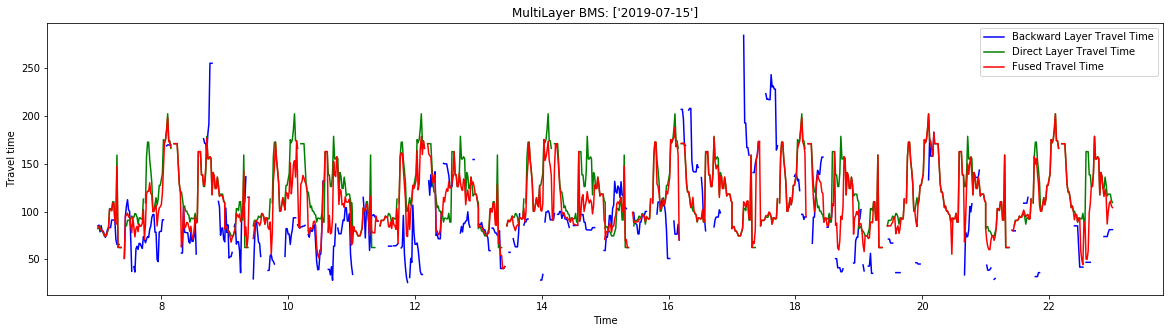

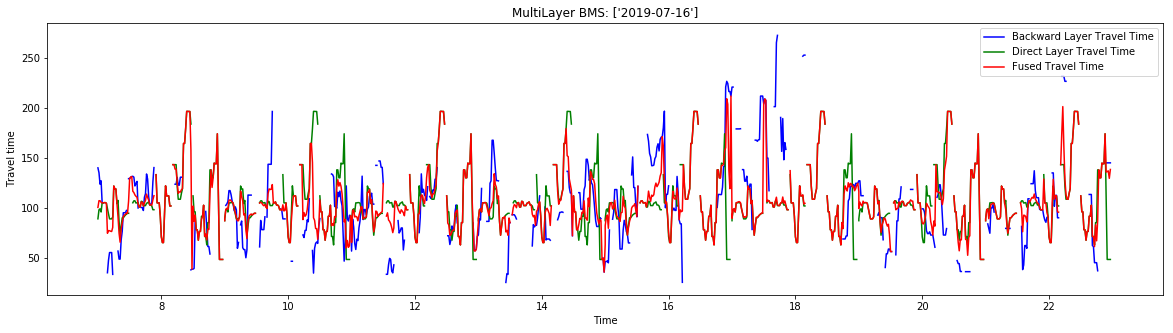

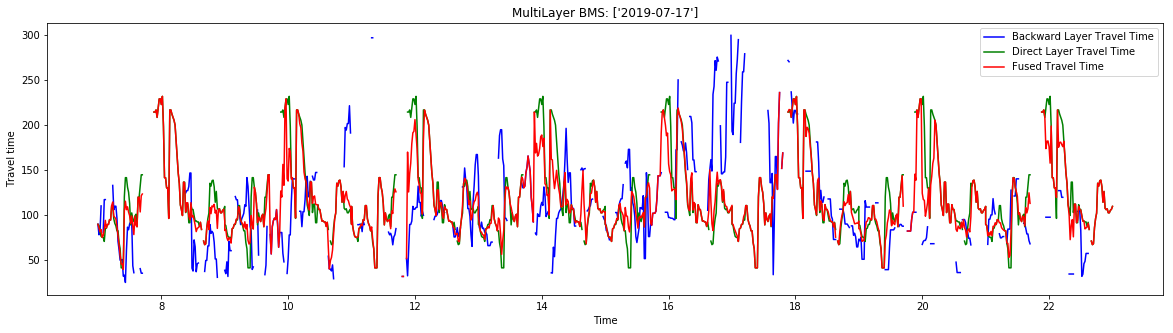

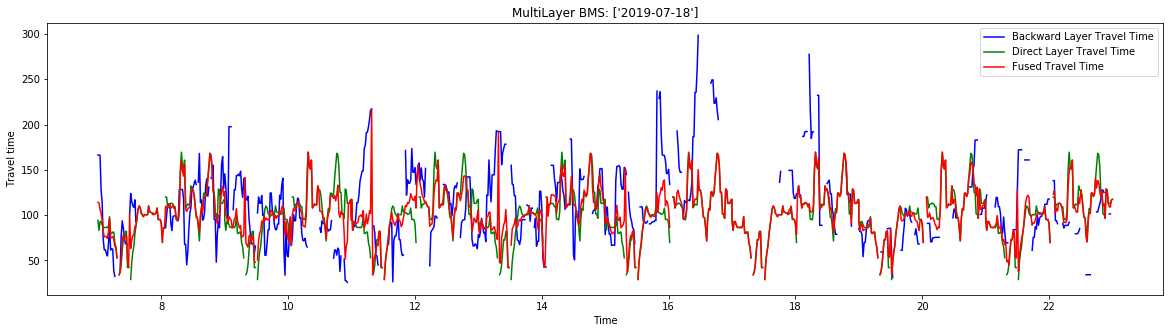

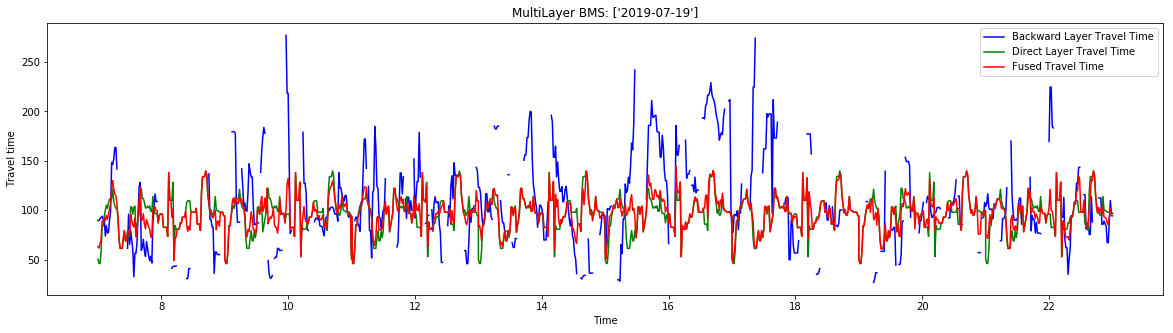

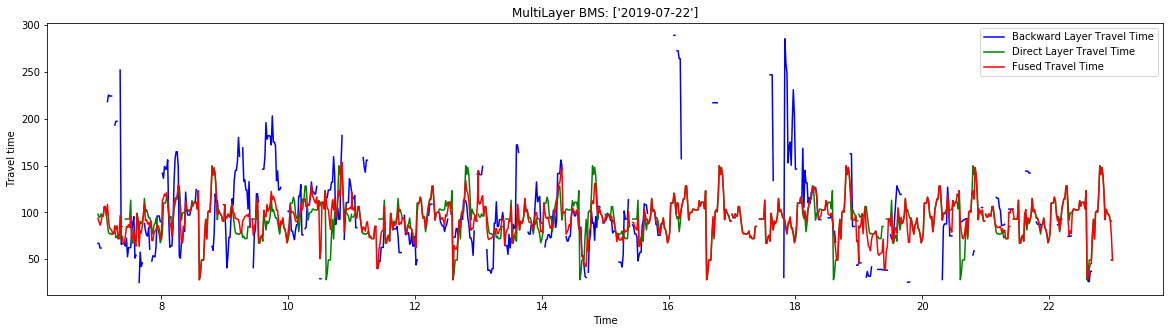

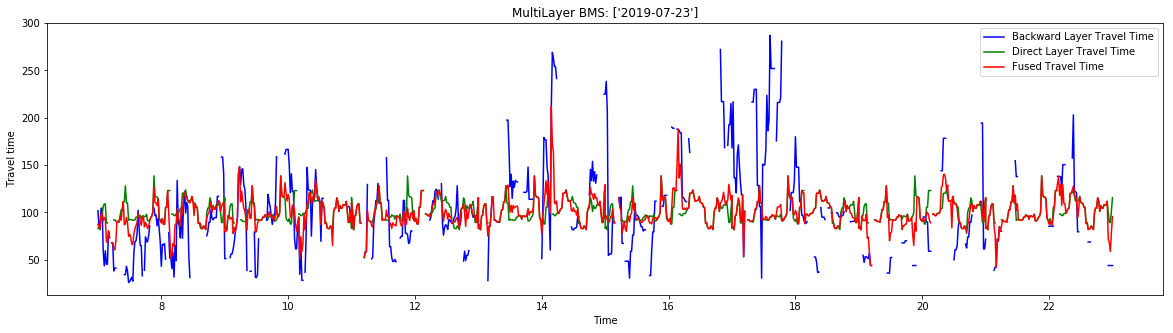

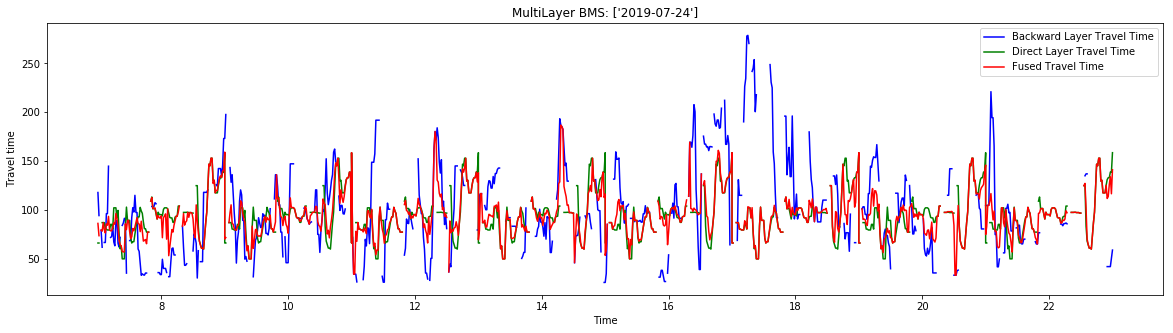

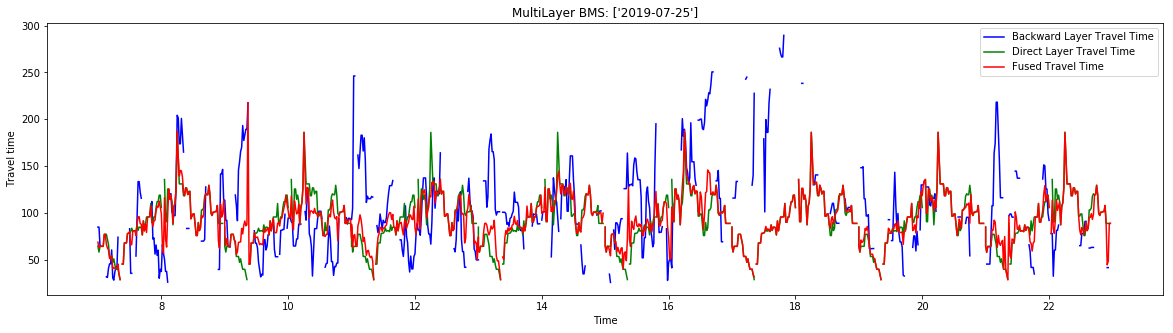

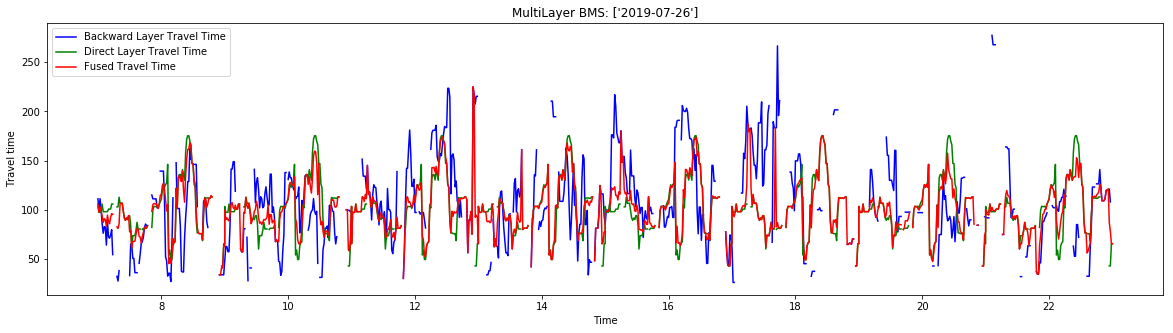

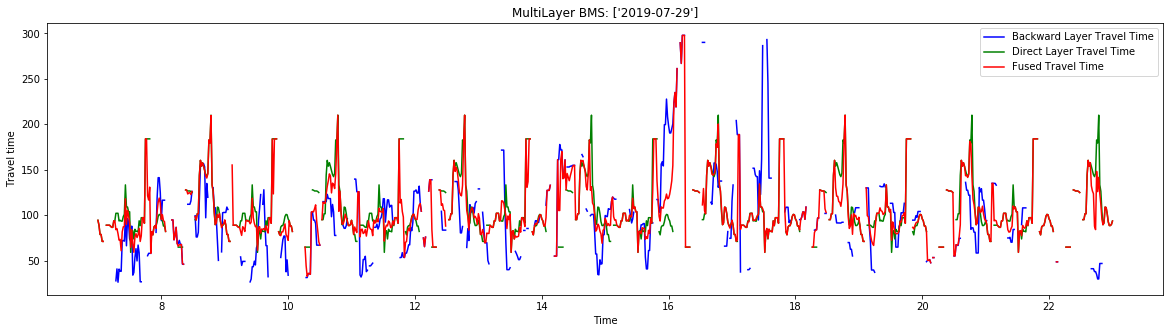

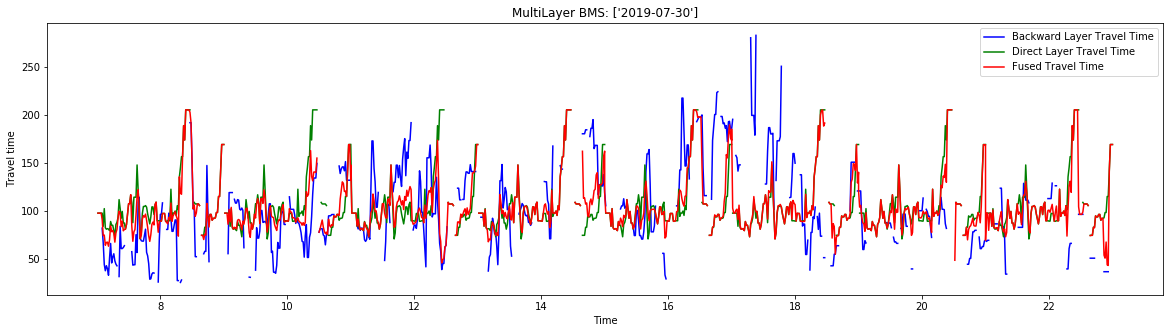

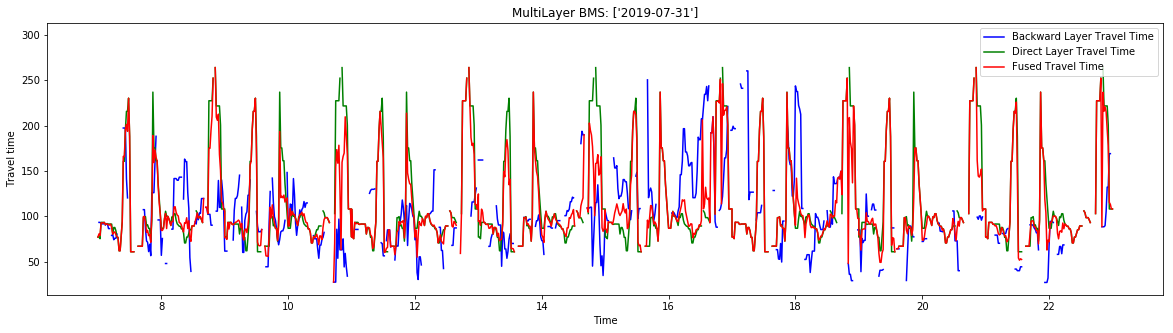

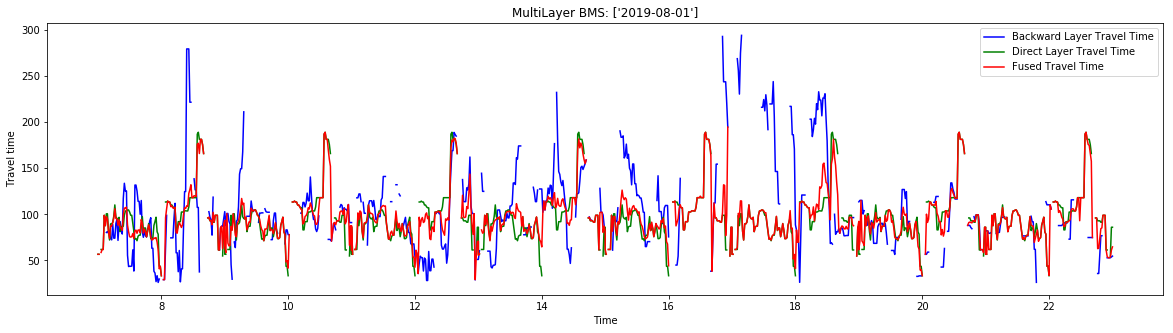

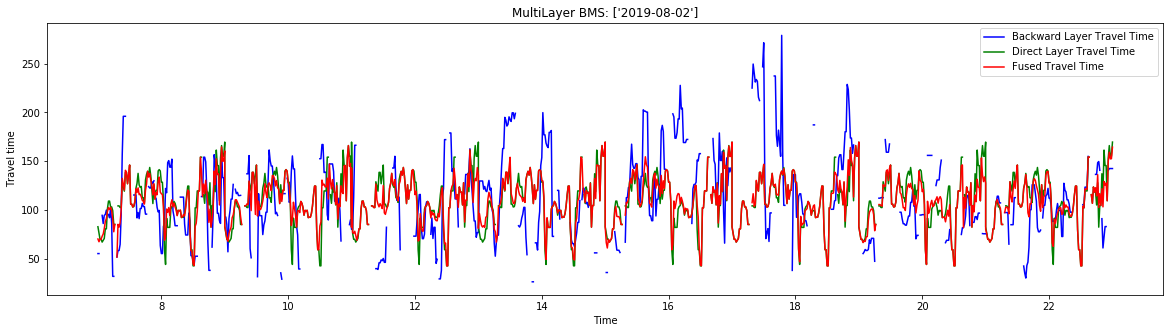

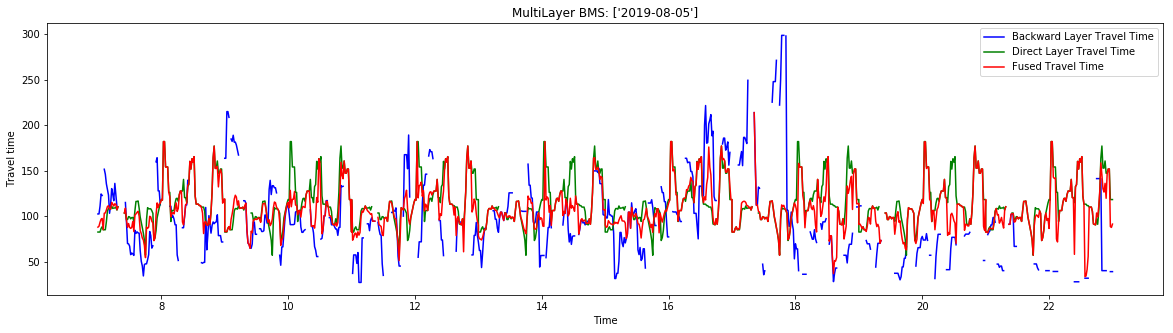

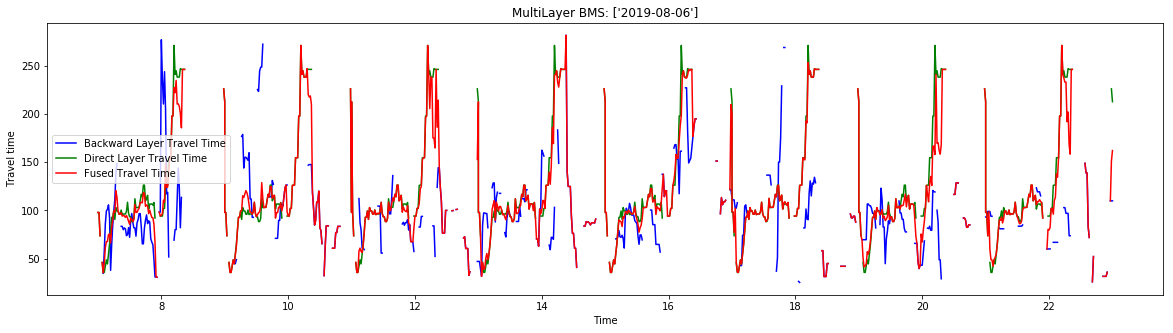

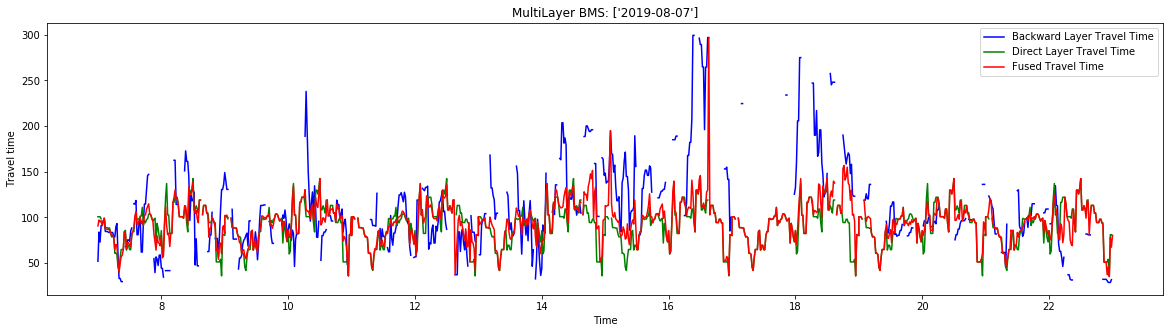

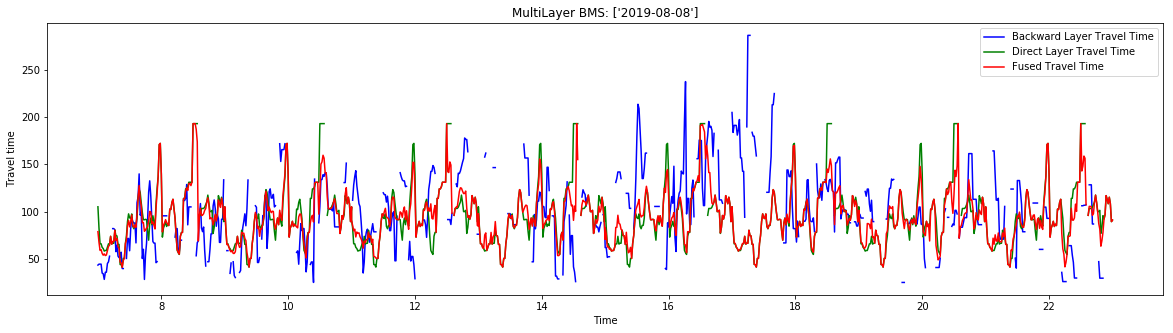

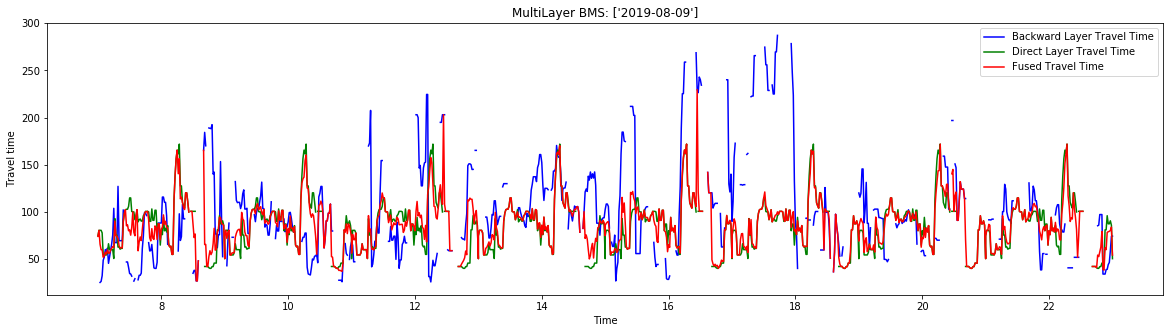

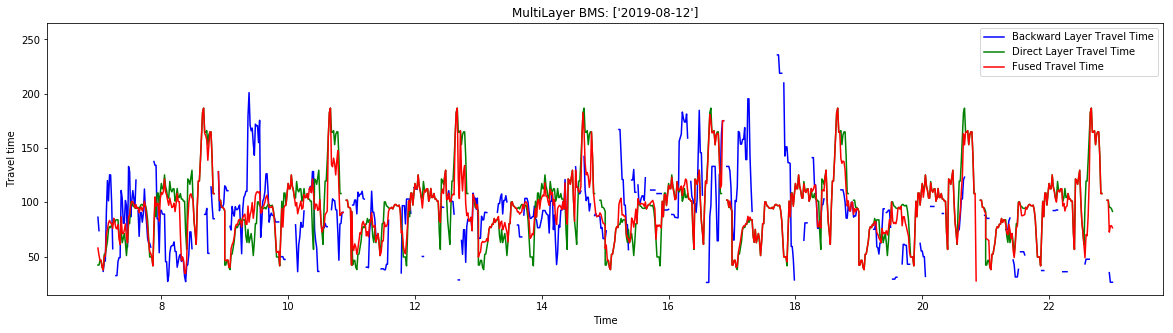

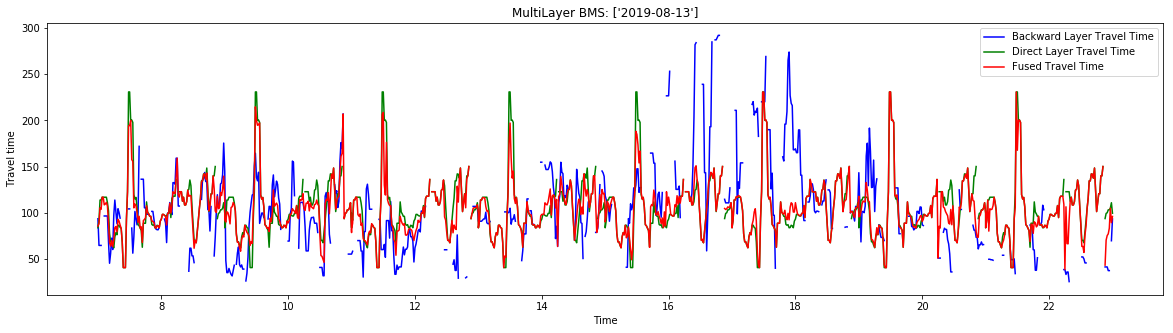

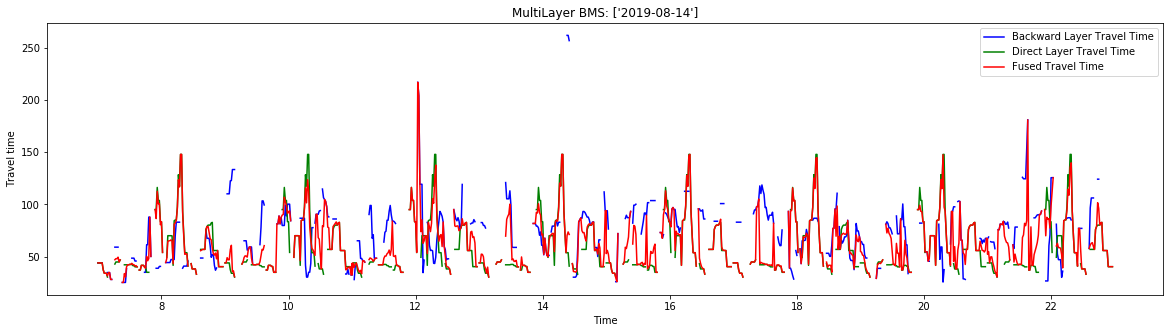

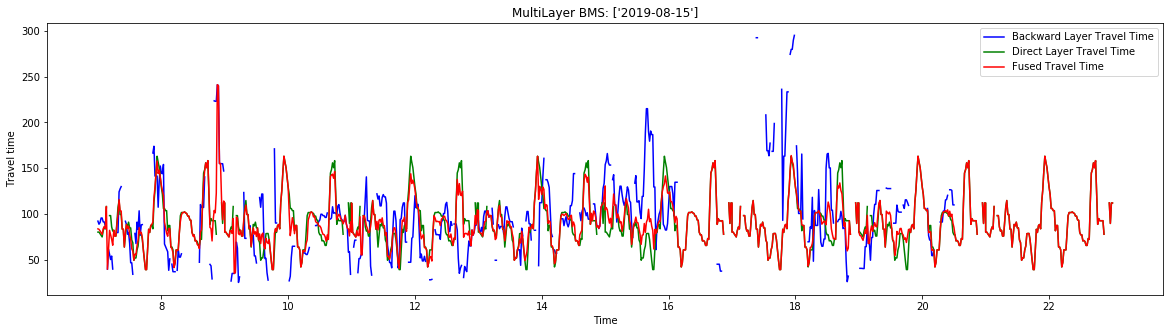

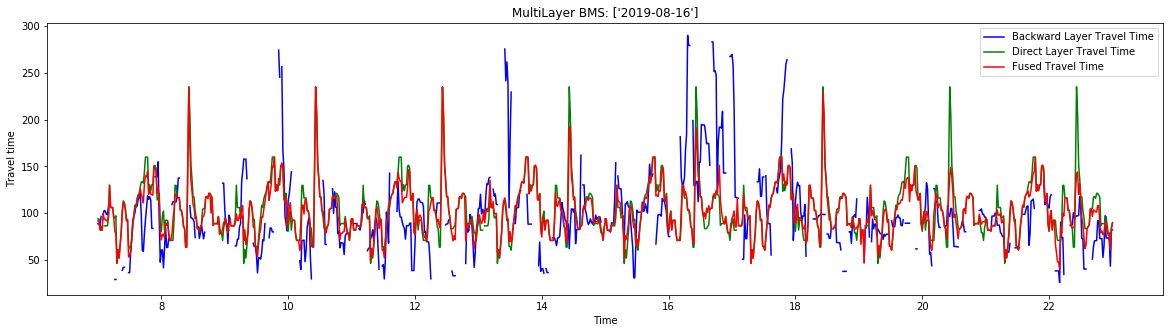

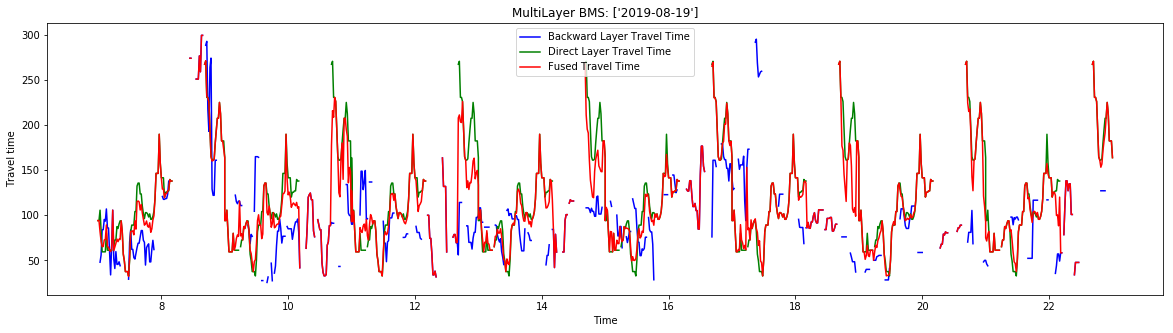

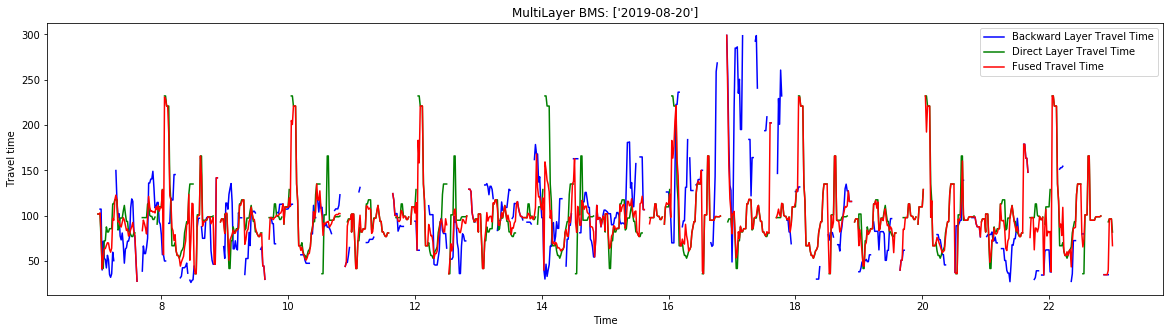

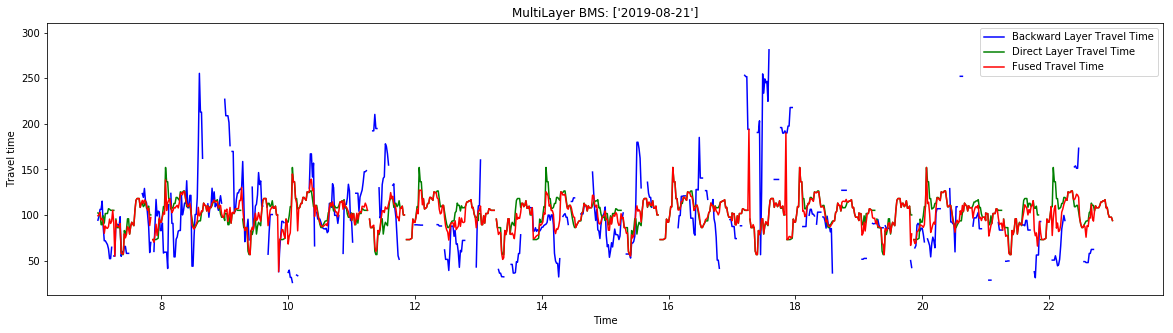

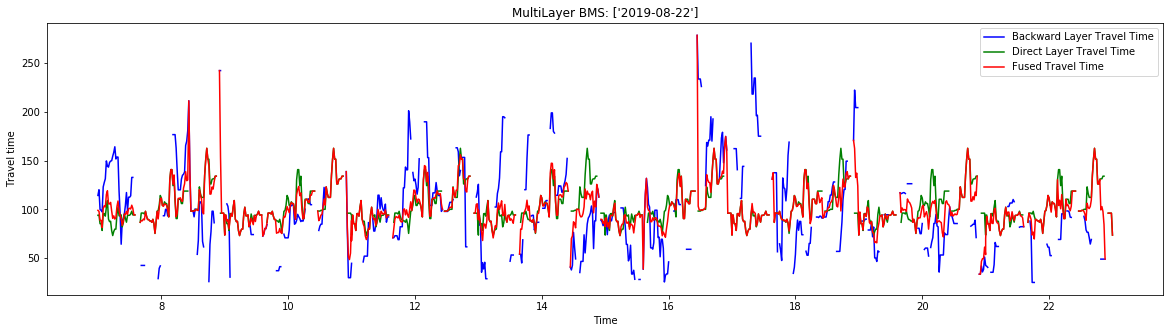

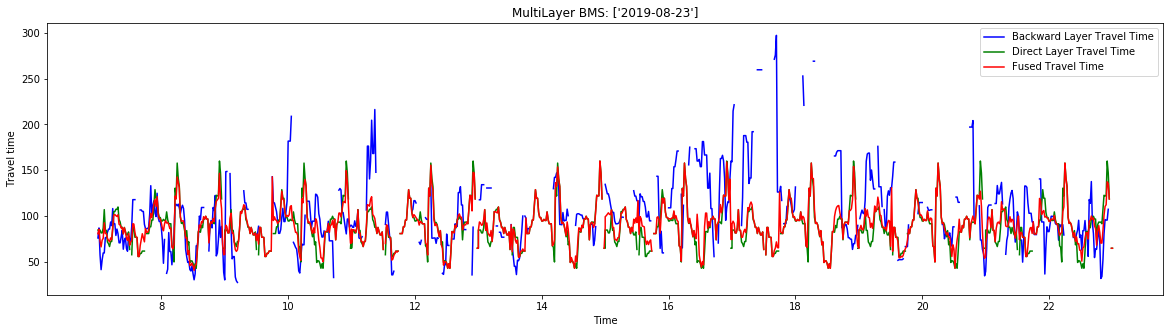

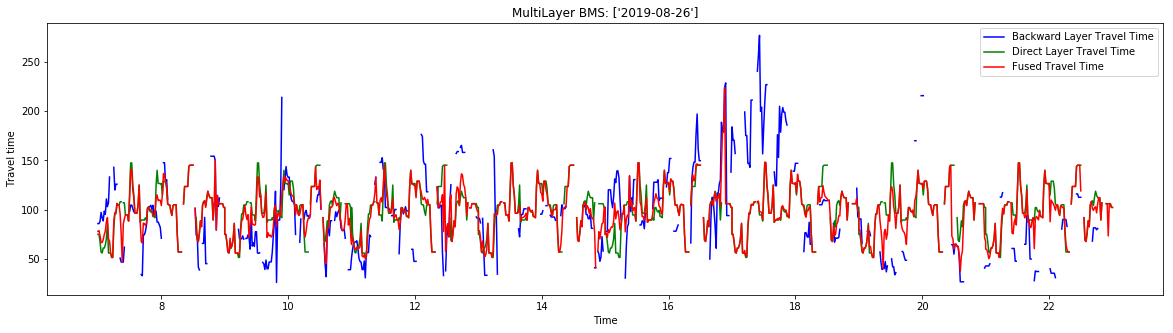

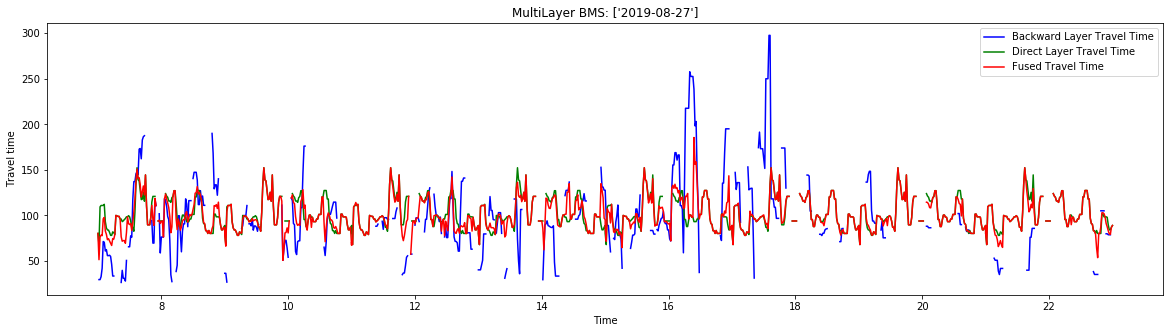

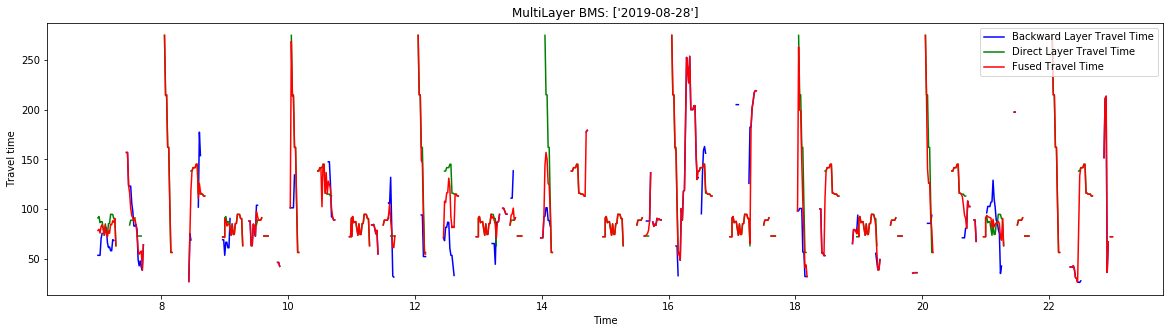

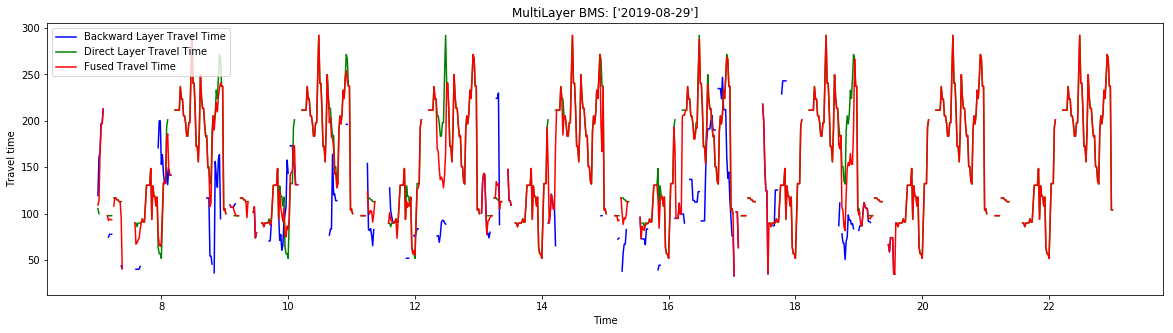

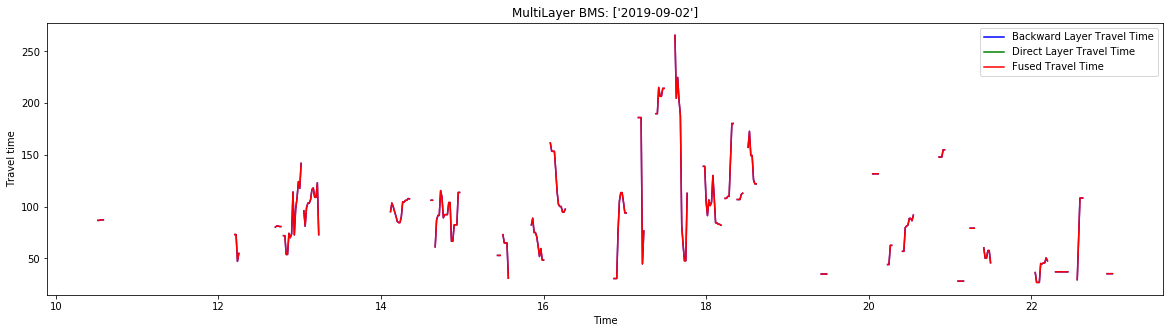

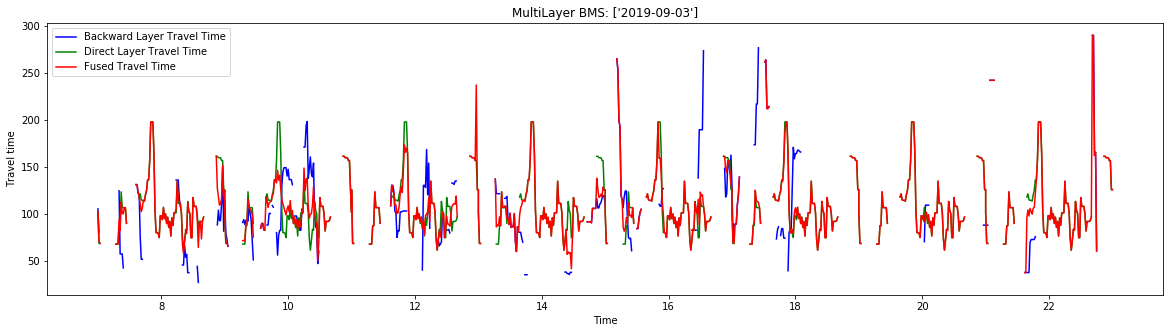

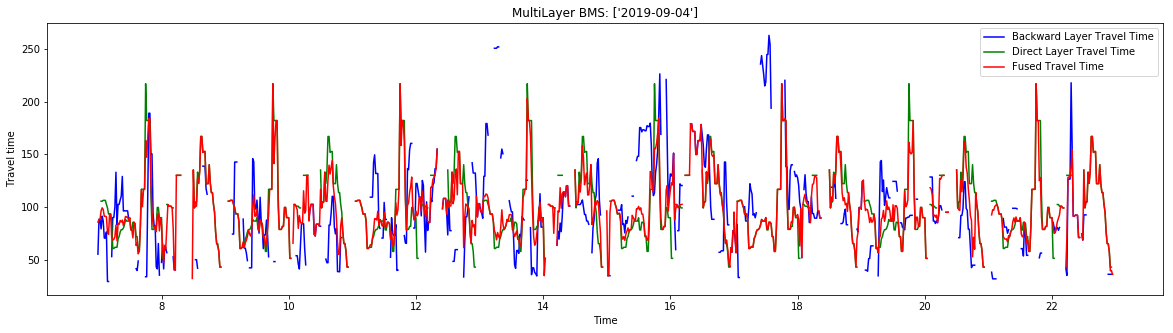

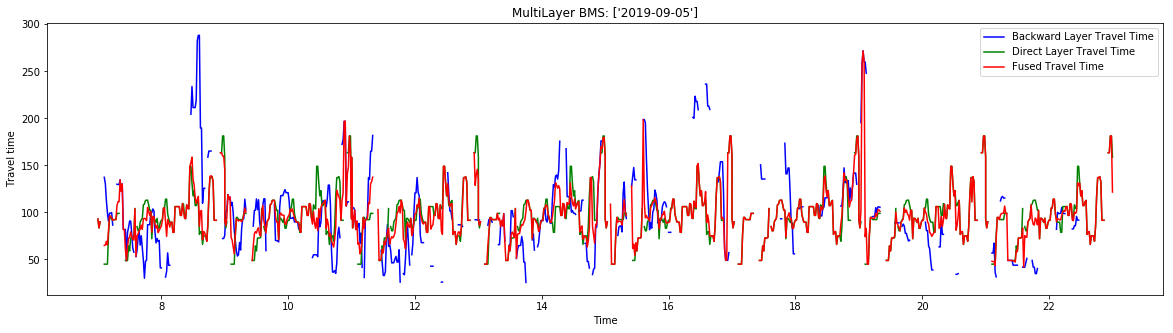

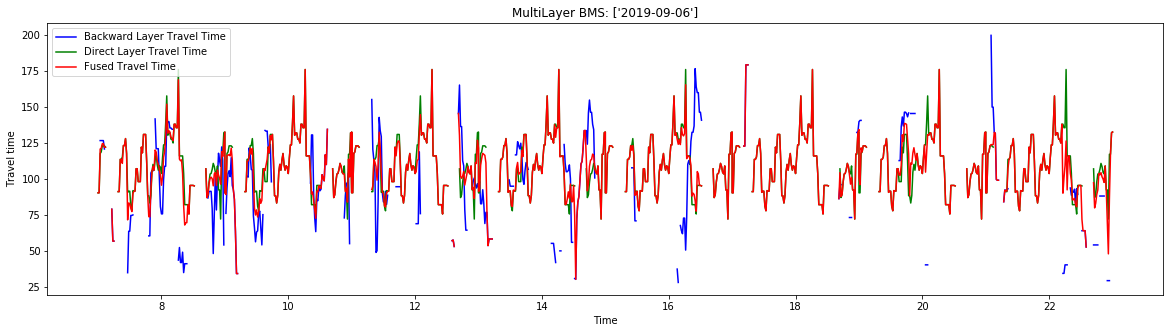

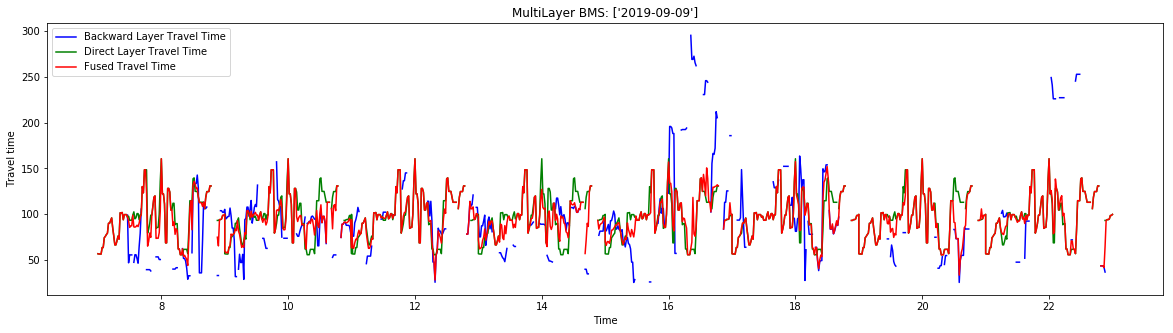

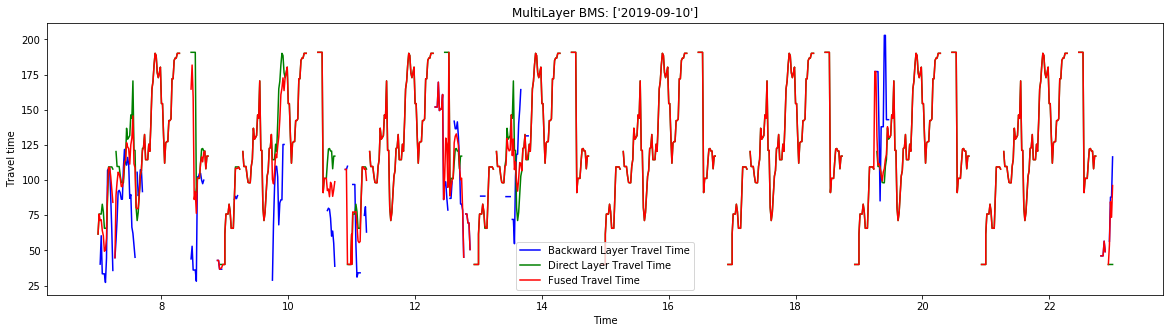

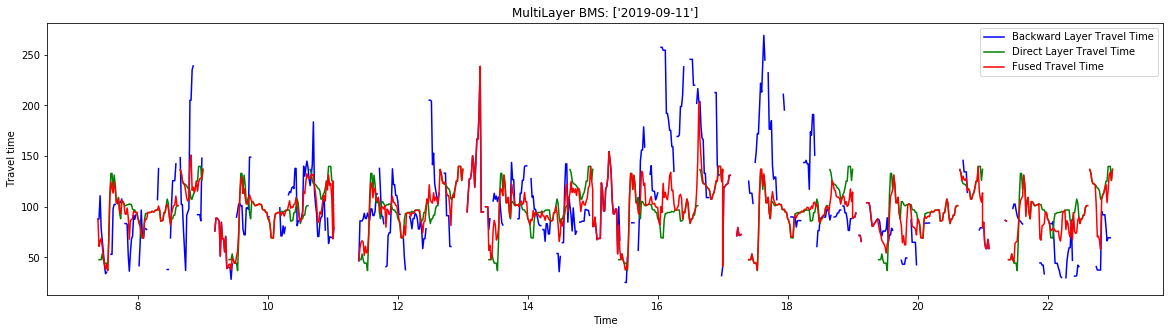

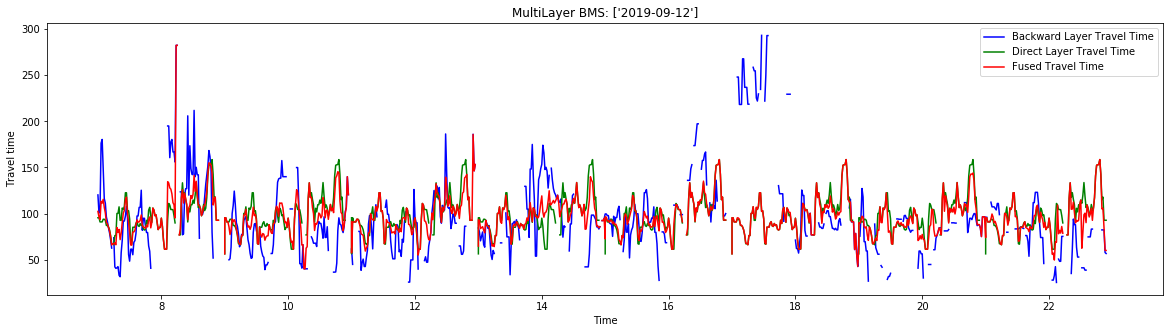

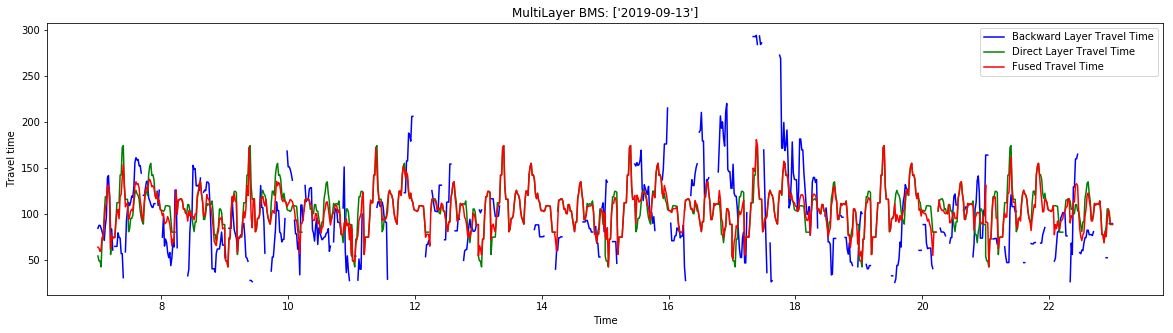

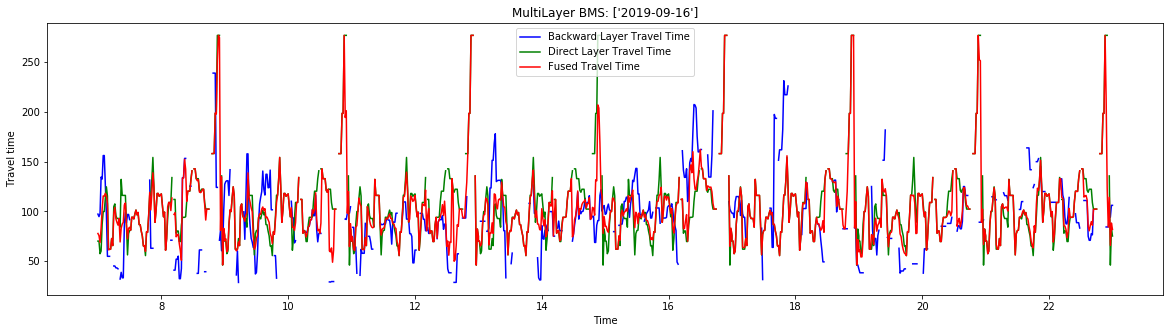

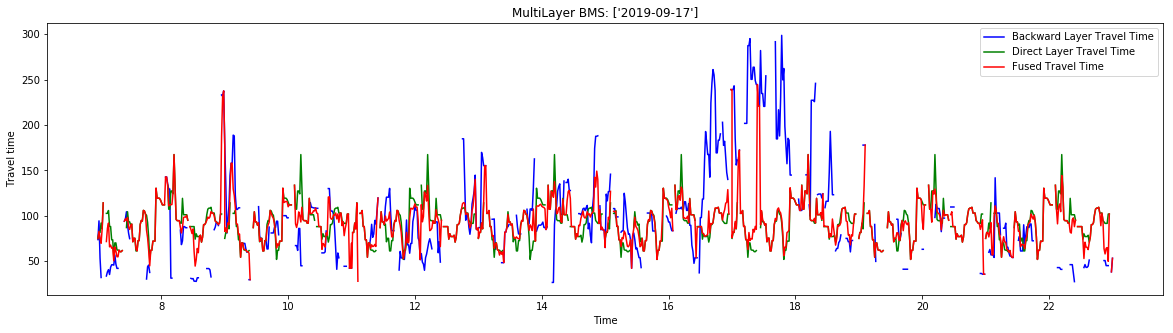

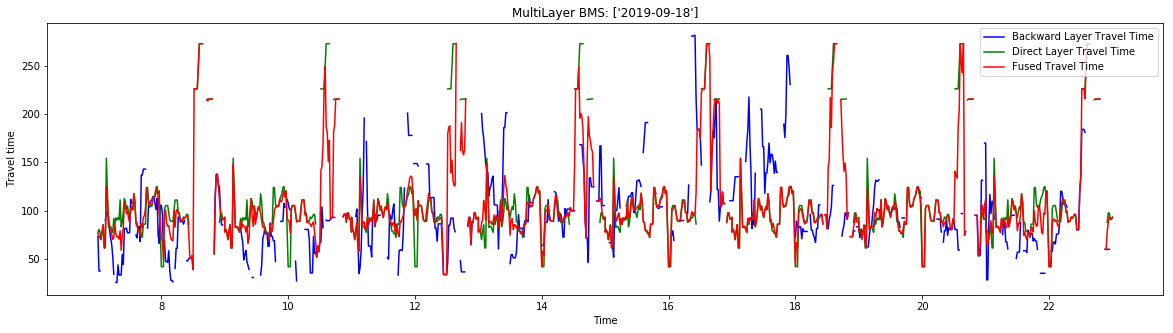

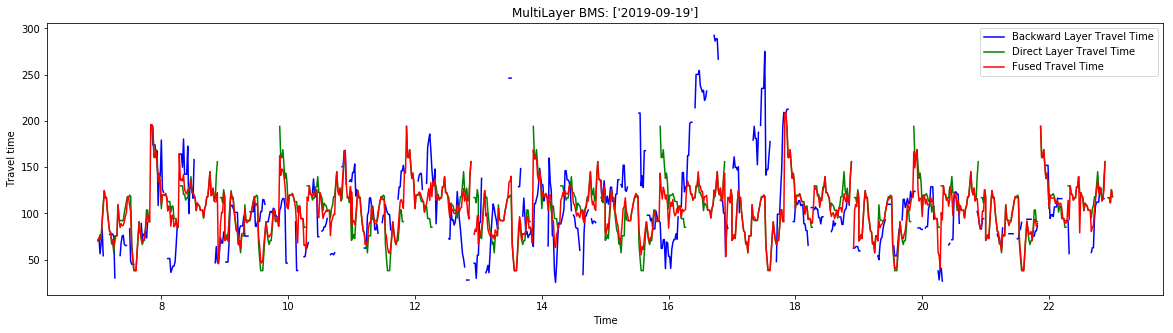

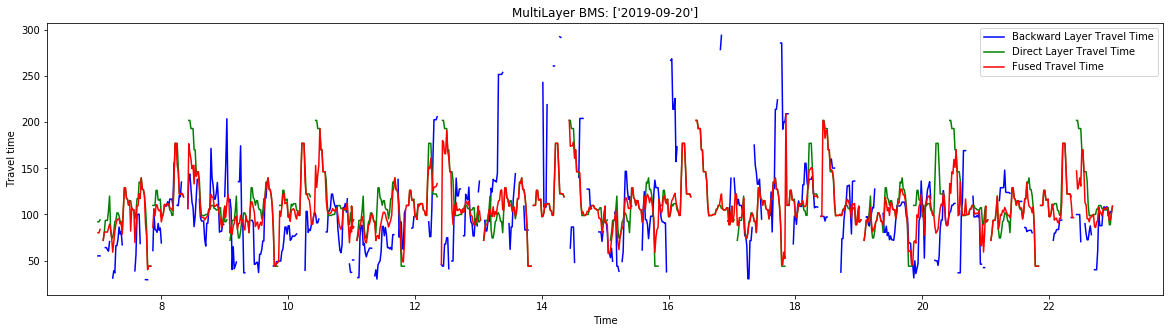

In [79]:
PLOT(Fusion) 

C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\shesa\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

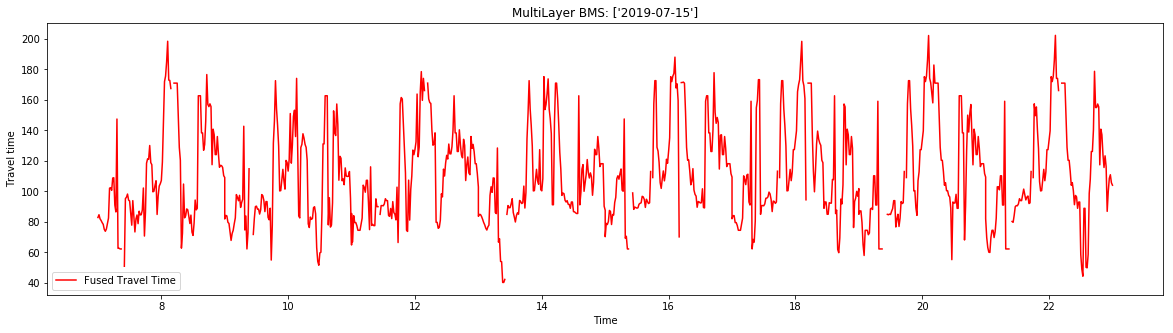

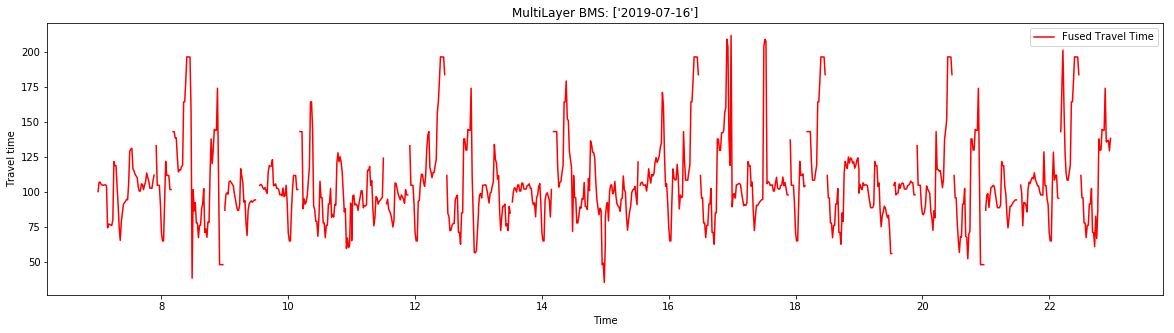

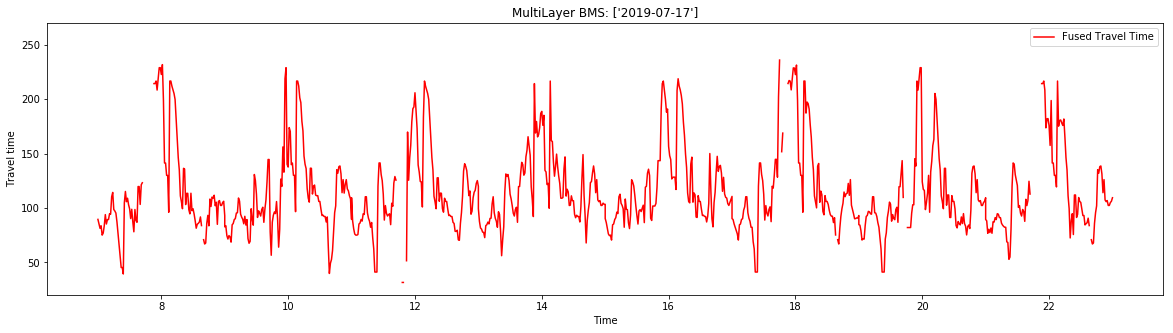

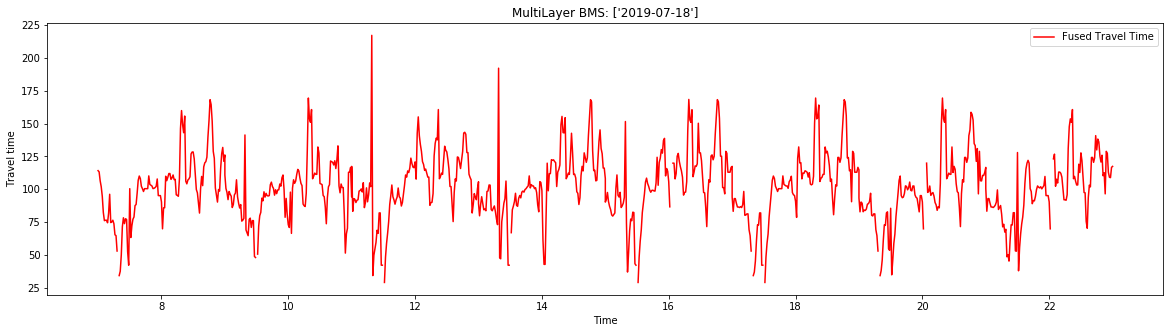

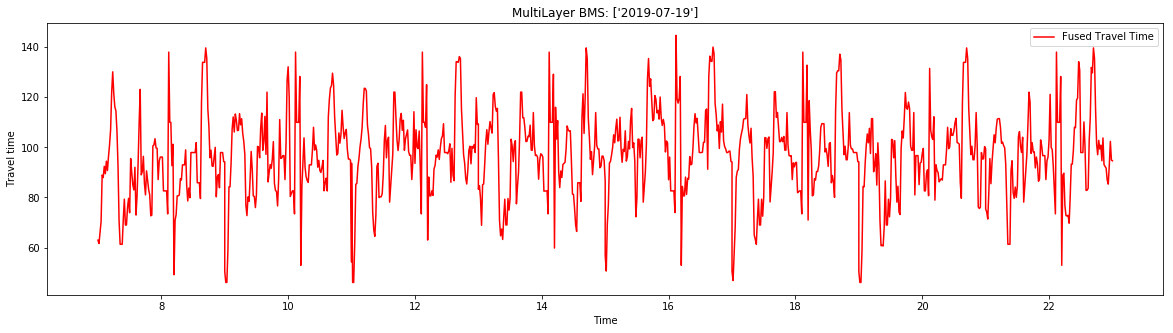

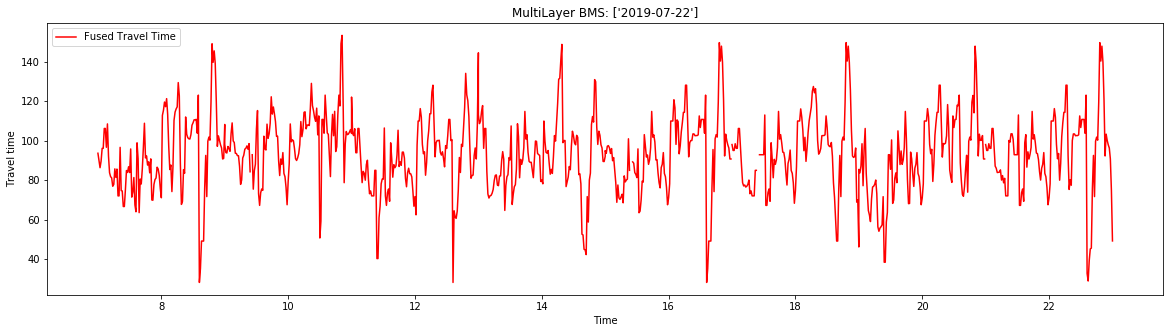

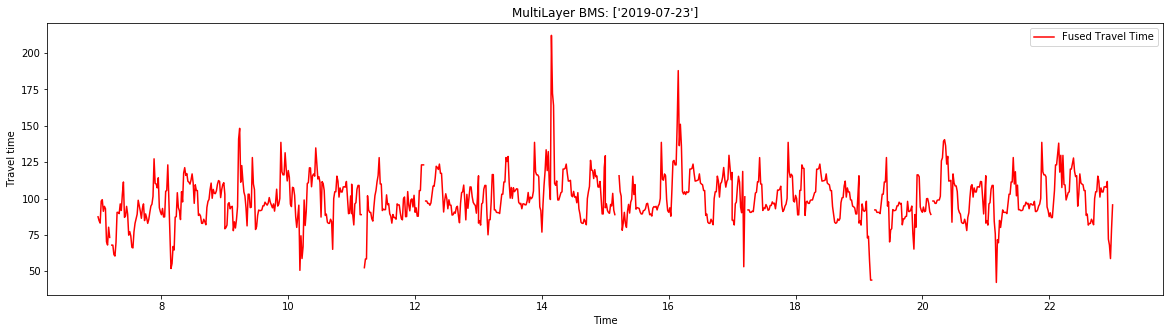

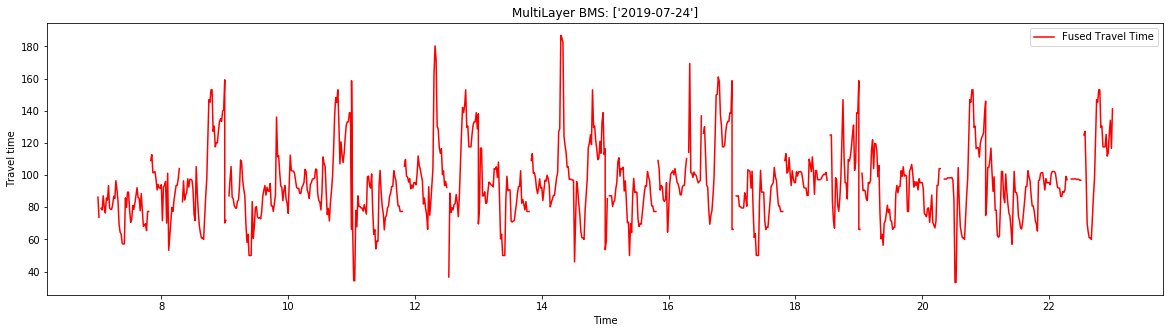

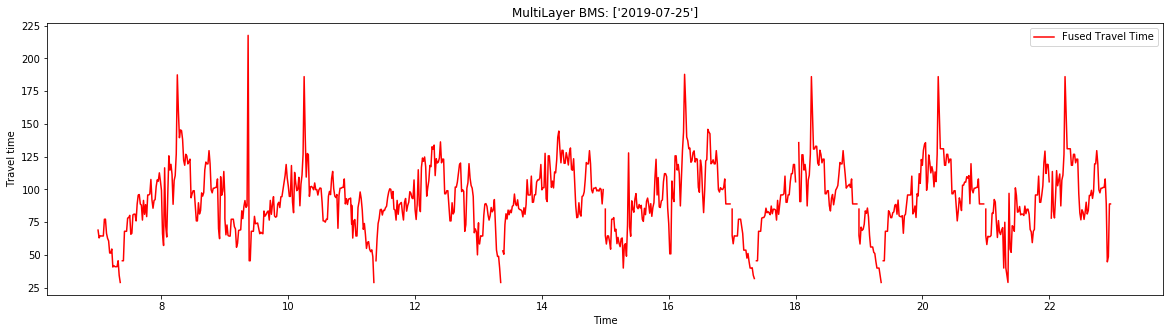

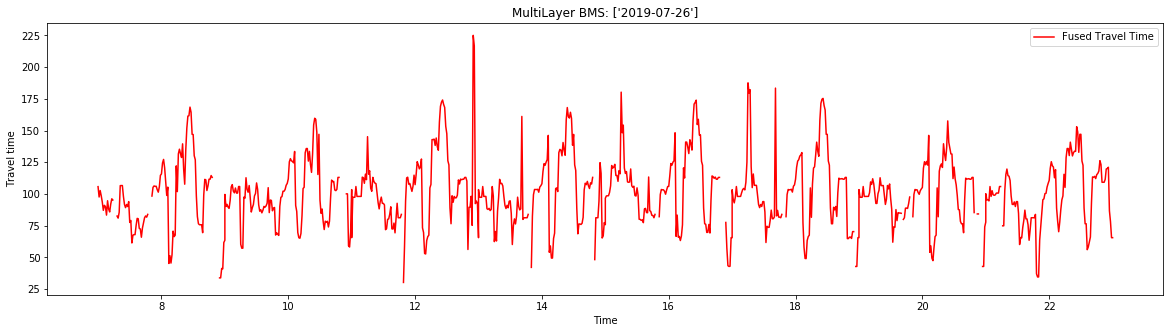

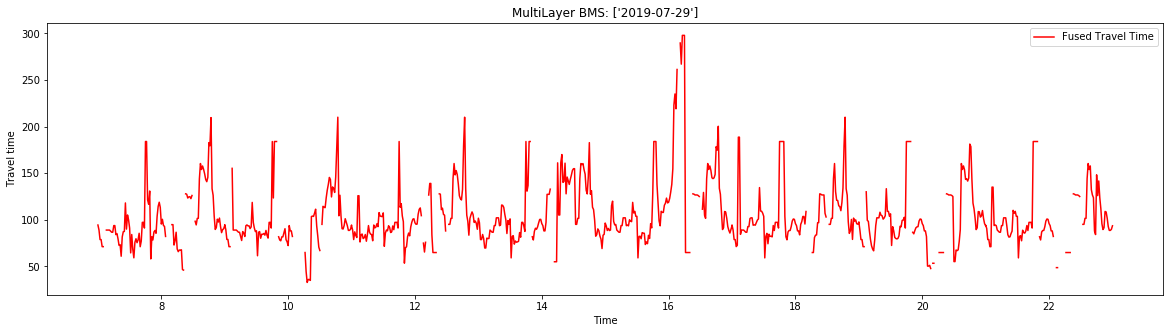

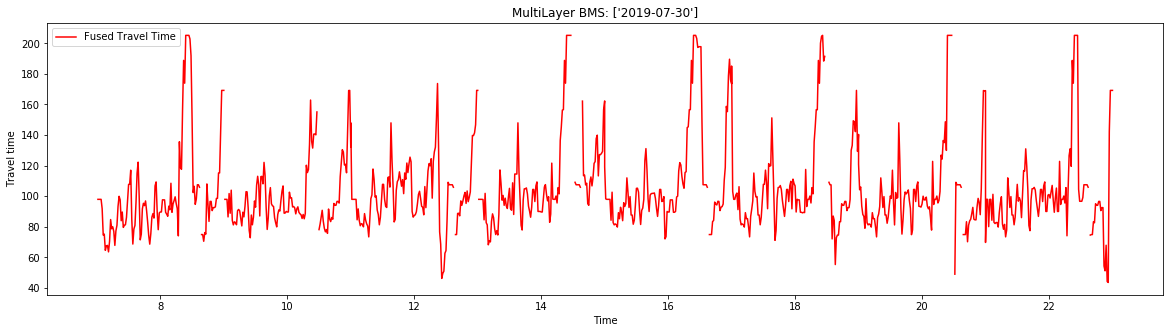

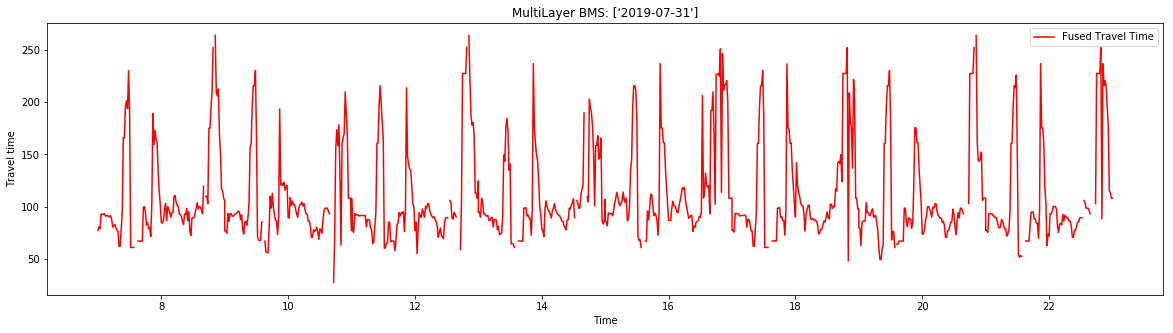

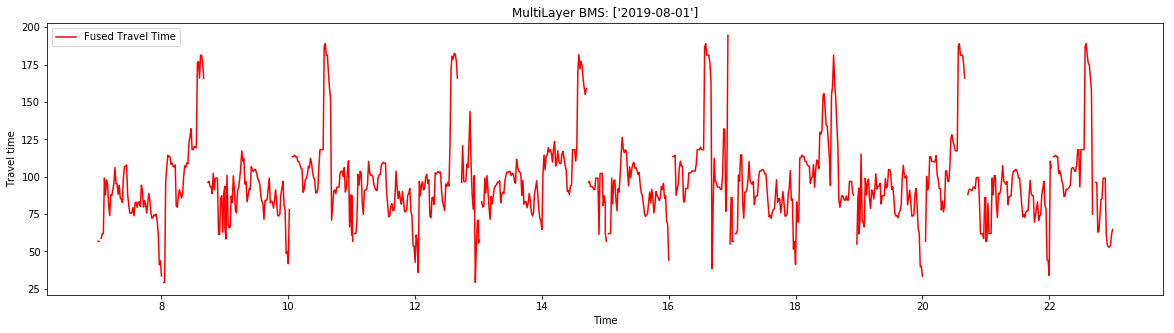

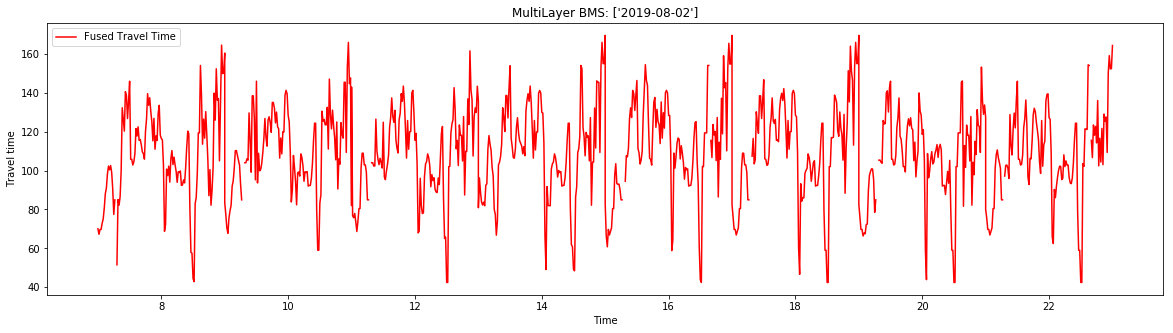

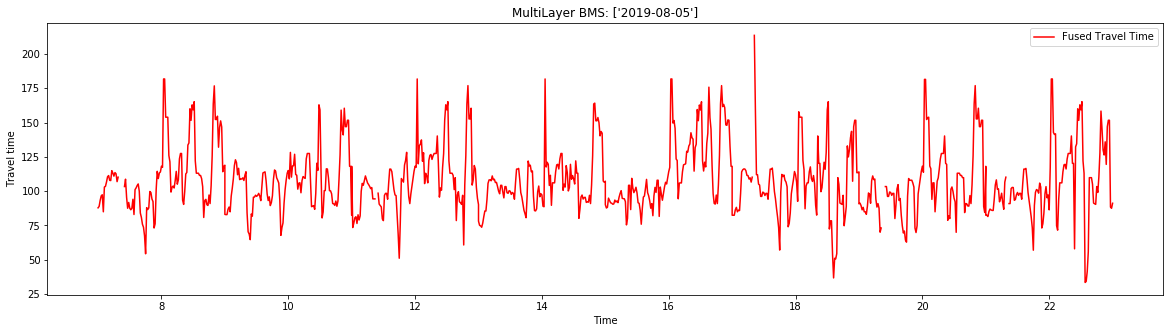

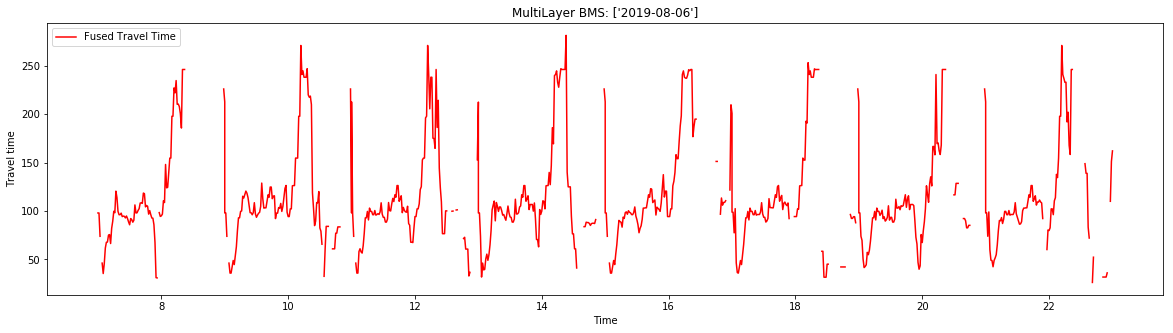

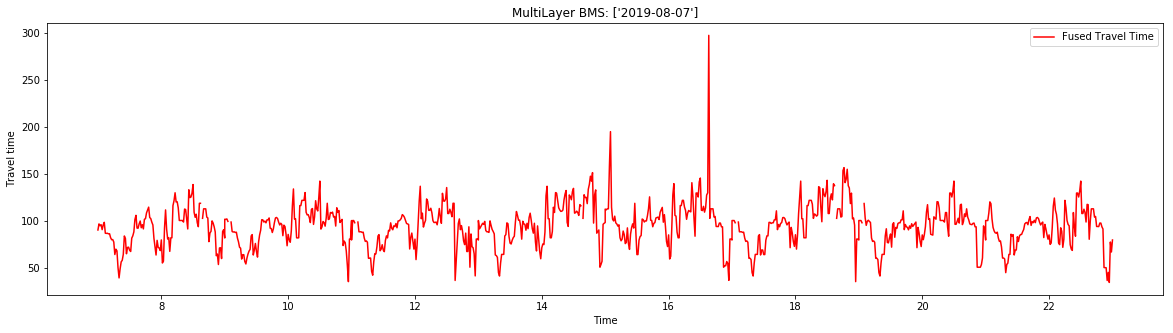

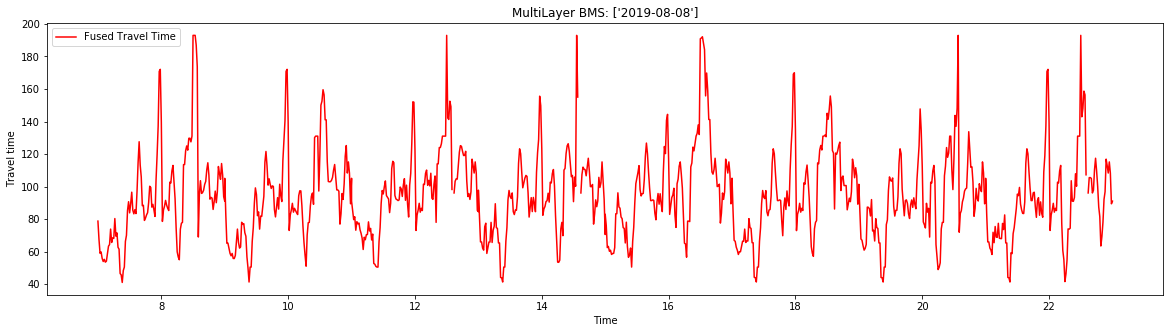

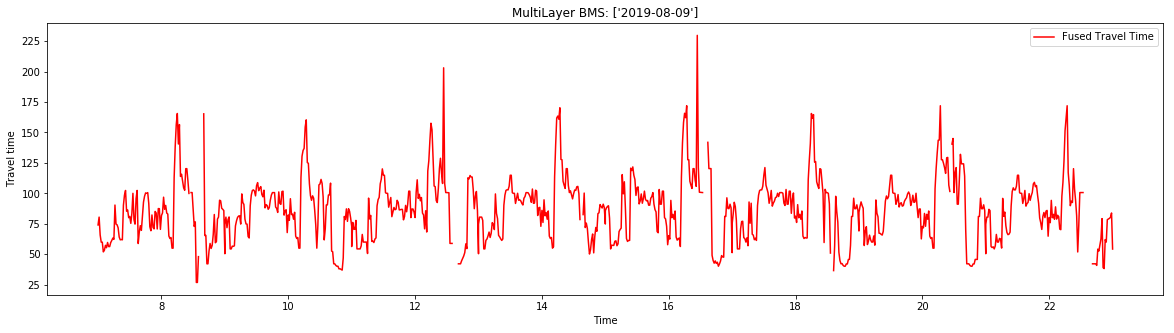

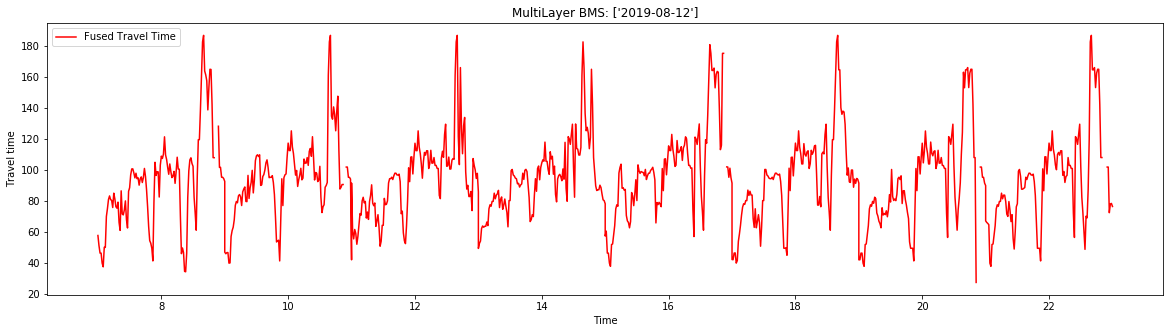

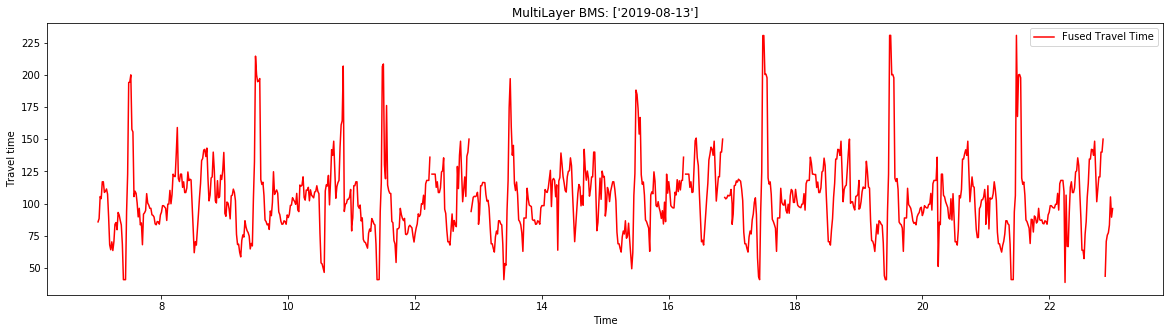

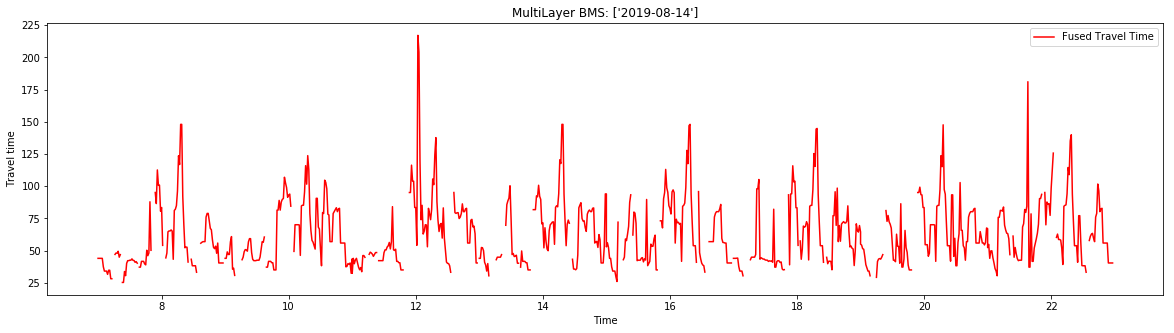

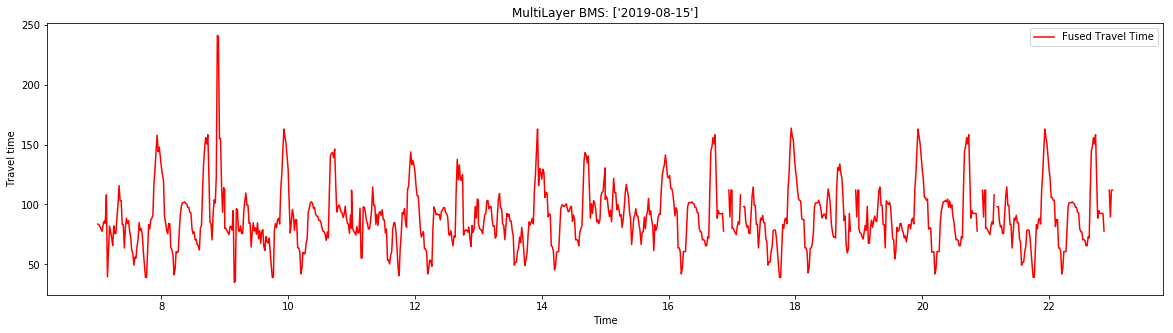

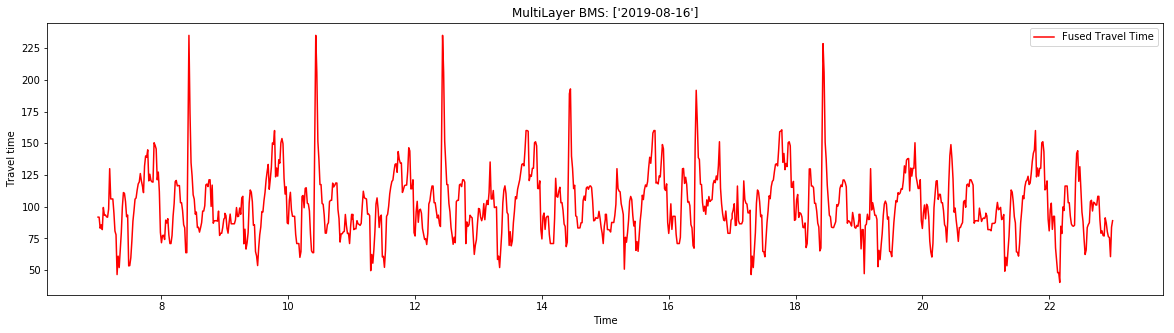

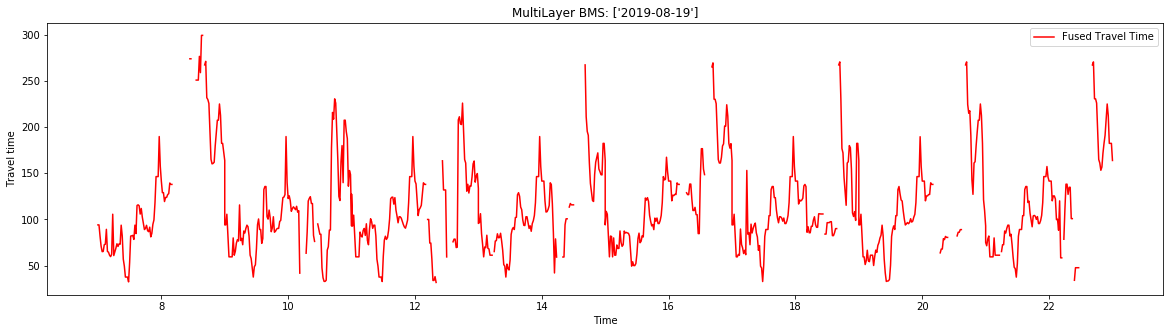

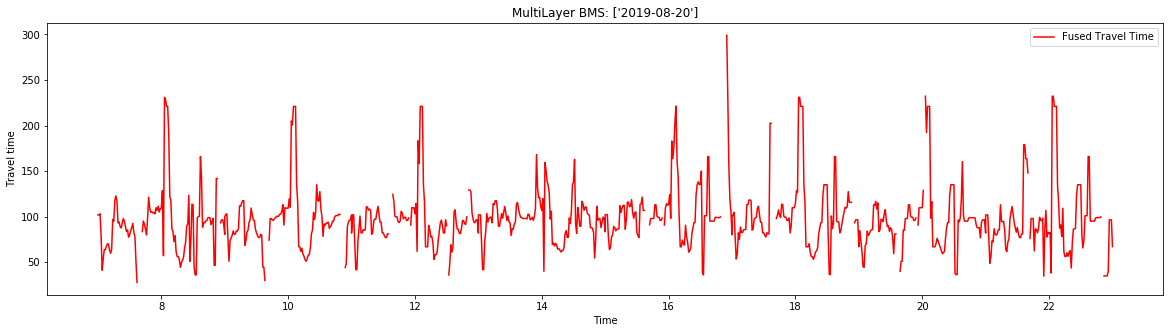

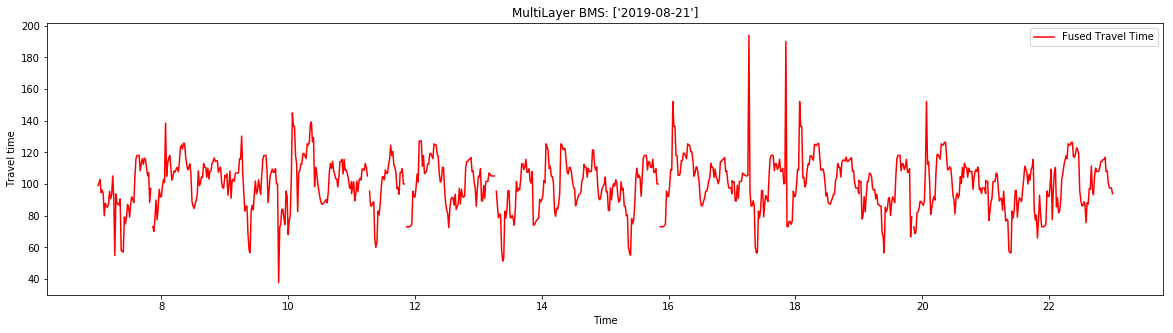

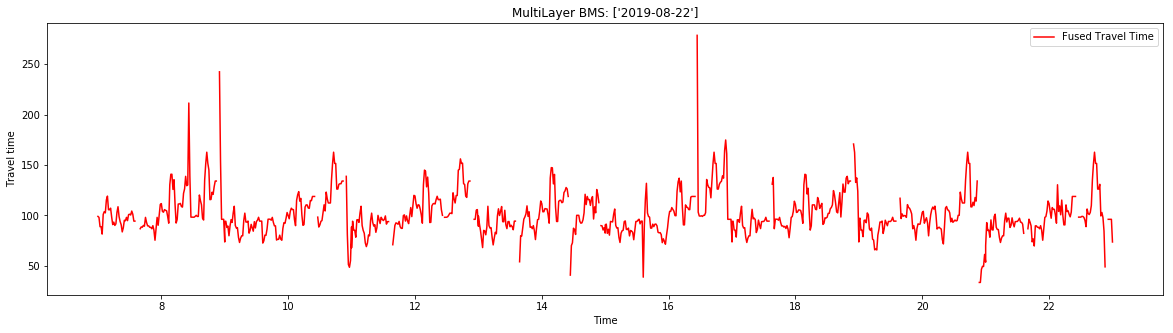

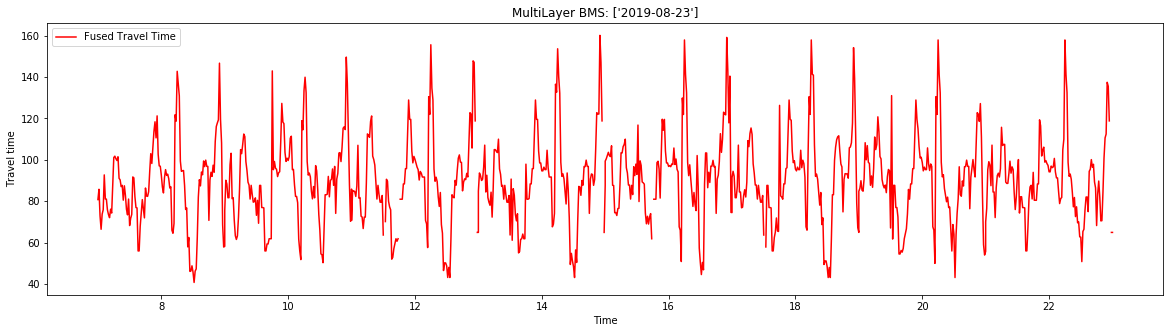

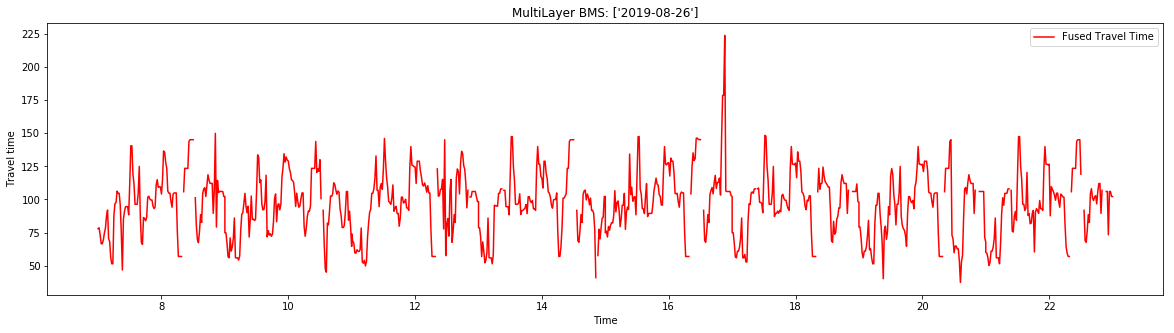

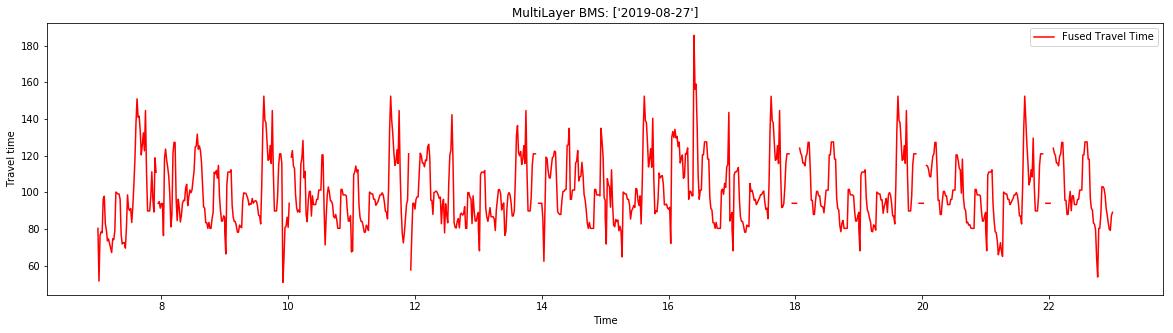

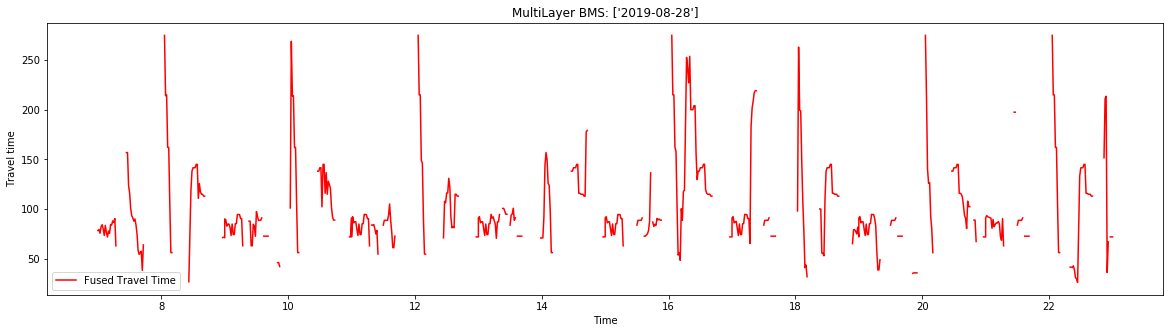

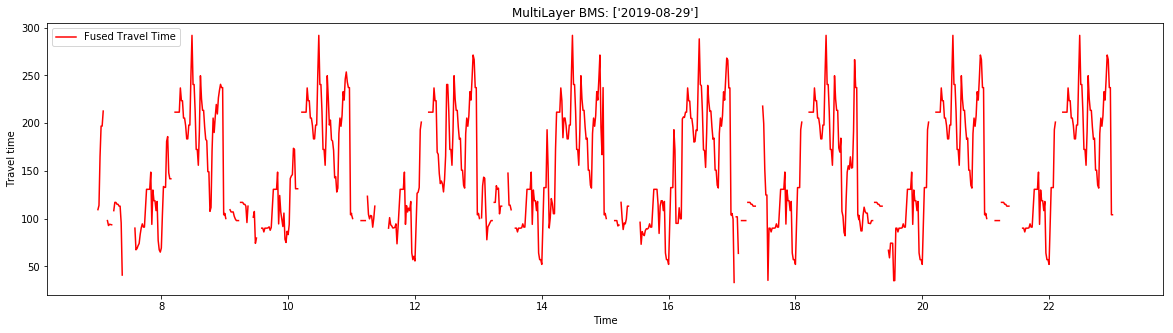

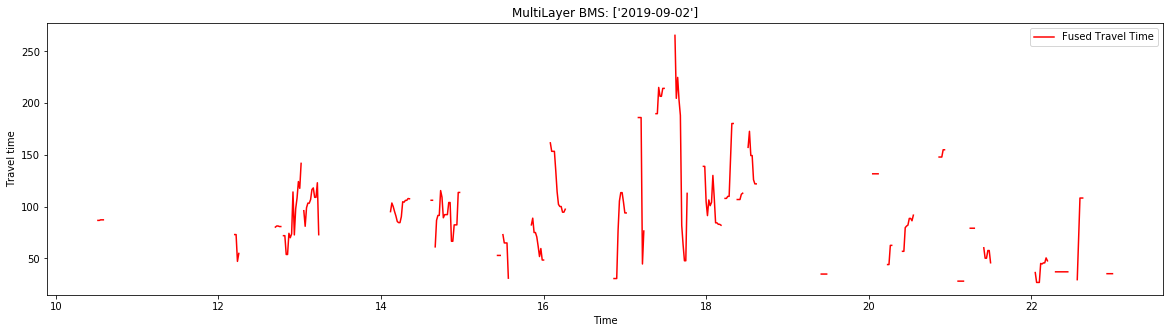

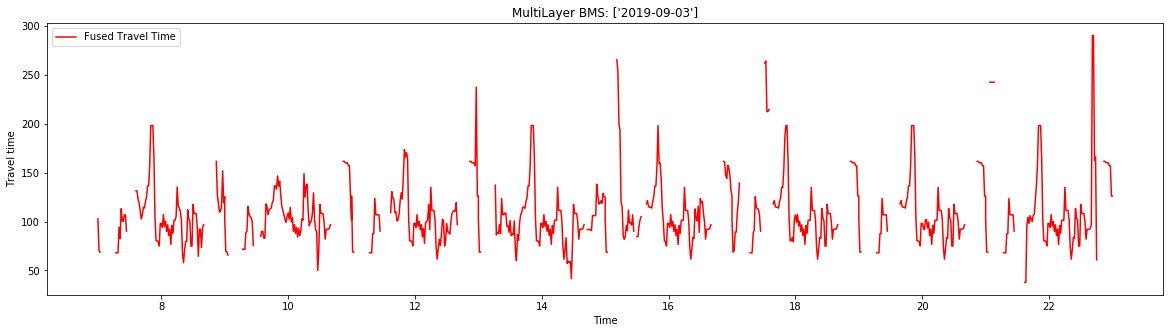

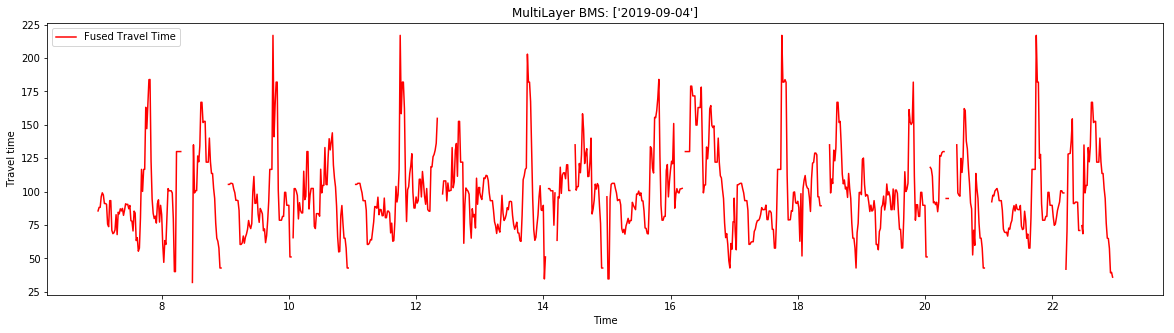

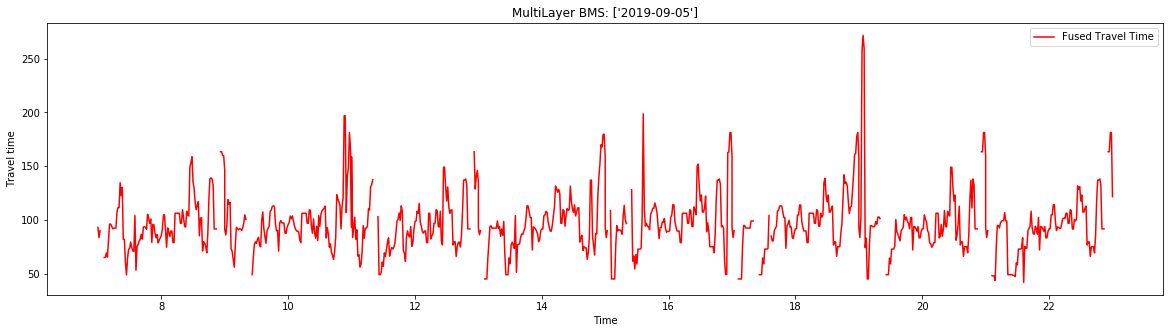

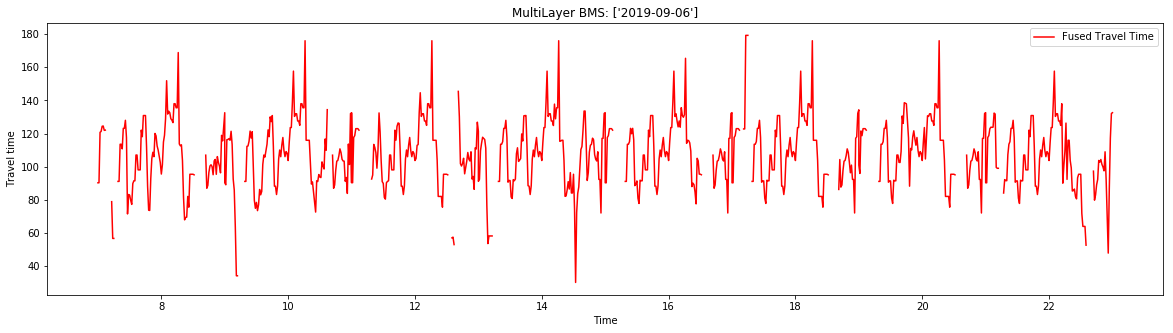

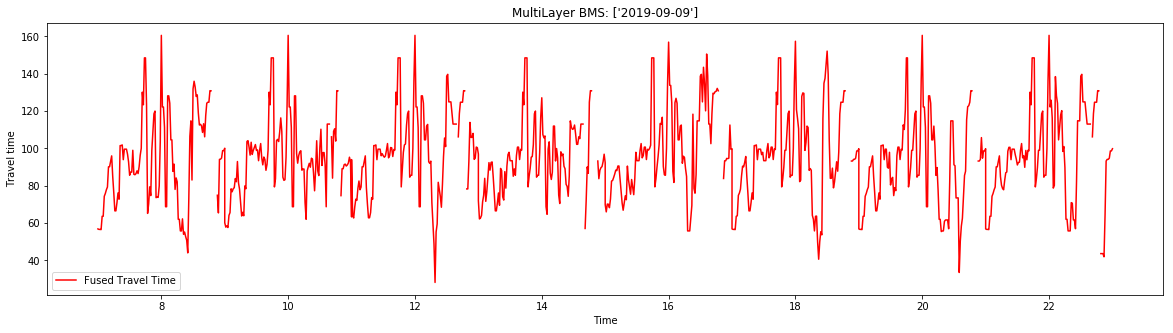

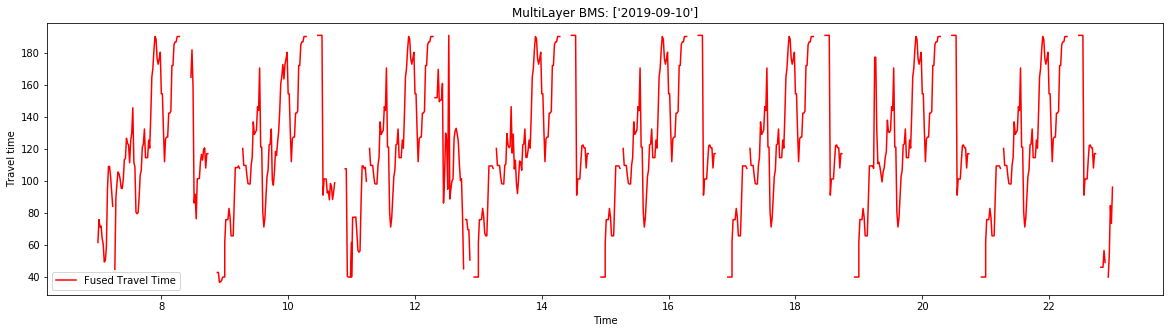

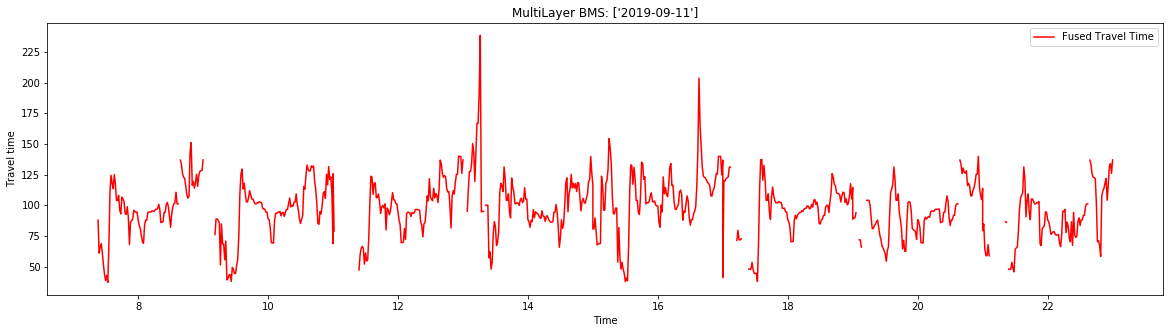

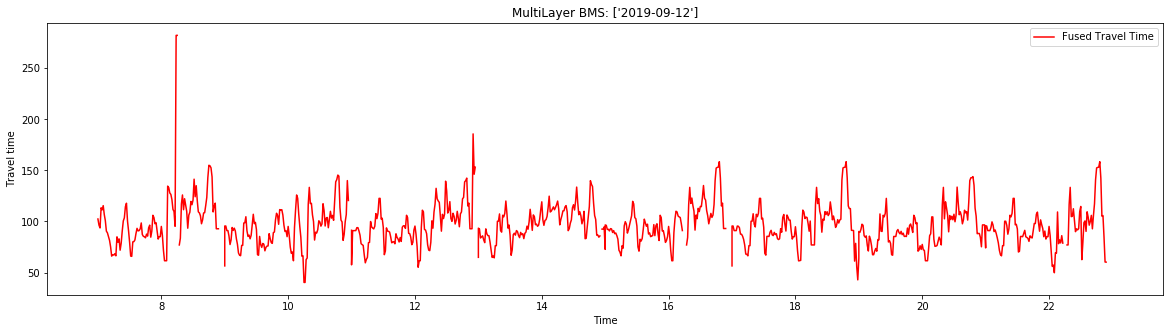

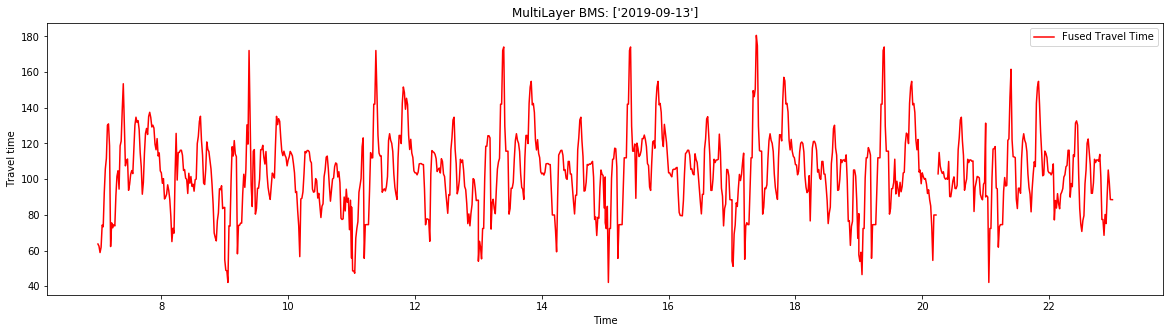

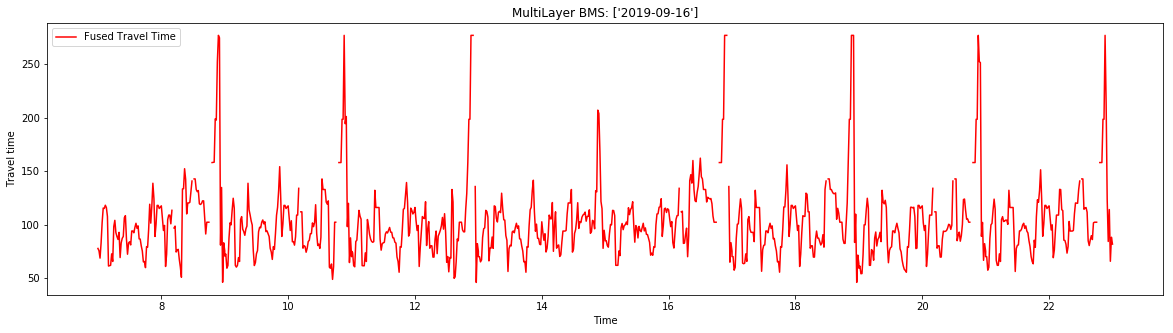

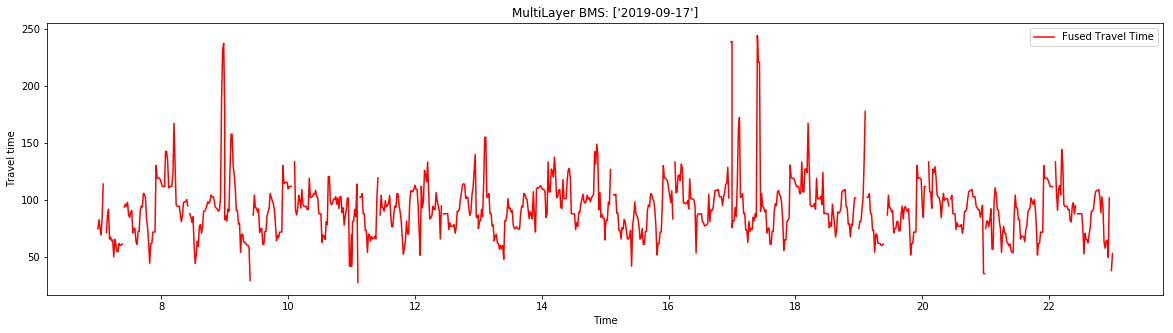

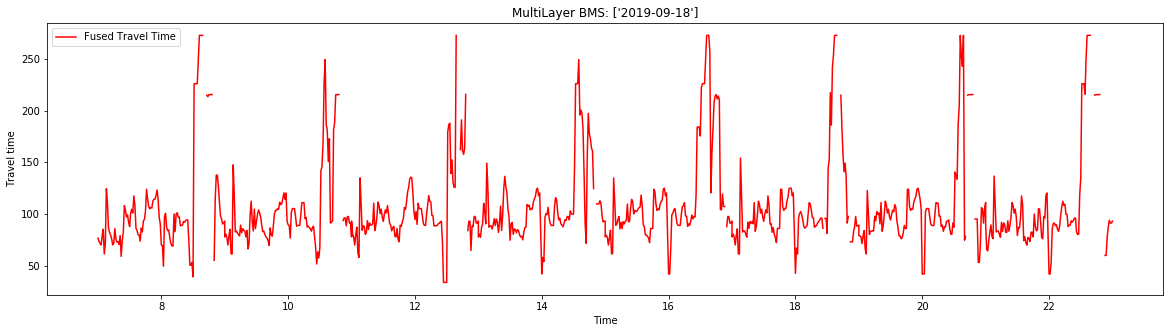

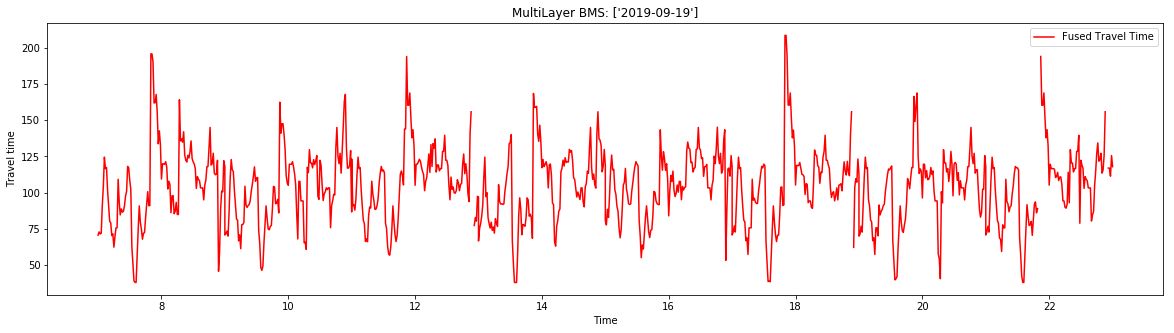

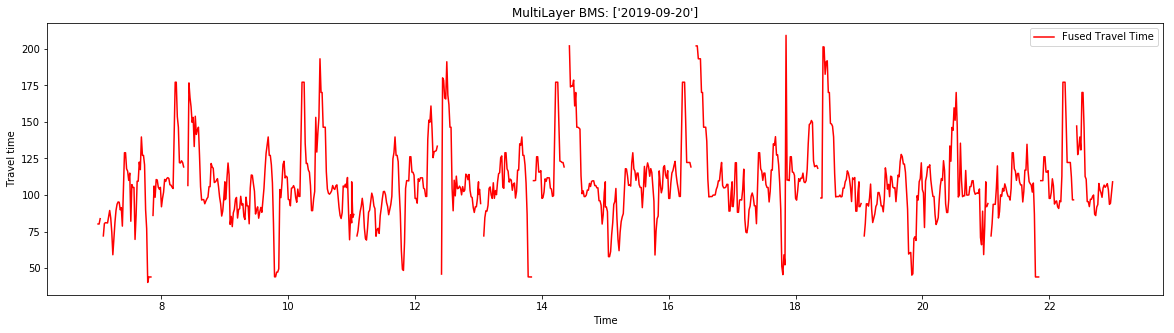

In [78]:
PLOT_nofused(Fusion) 